## Desktop ipynb for proteomics cox models (paper output)

## Overview
1. Import packages <br>
2. Read in and split data <br>
3. read in train and test <br>
4. impute data <br>
5. read in imputed train and test (skip here in future) <br>
6. make table one summaries <br>
7. Cox models <br>



## import packages

In [1]:
import pandas as pd
import numpy as np
import tableone
import sklearn 
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # Enables the IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

## read, split, rename, and select variables for cox models

In [2]:
# Read the CSV file
data = pd.read_csv('~/Desktop/data/ukb_v2/proteomics/linked_proteomics.csv')

# Summarise ins_index and drop all follow-up visits
value_counts = data['ins_index'].value_counts()
print(value_counts)

# Filter the data to keep only rows where ins_index is 0
data = data[data['ins_index'] == 0]

# Print the top 50 column names
print(data.columns[:50])

FileNotFoundError: [Errno 2] No such file or directory: '/users/clifton/ncu080/Desktop/data/ukb_v2/proteomics/linked_proteomics.csv'

In [ ]:
# Load the script containing the rename_features function
import sys
sys.path.append('/home/jesu4462/Desktop/code/ukb_test/')
from rename_features import rename_features
data.columns = rename_features(data.columns)
print(data.head())
print(data.columns[:50])

In [ ]:
# Check for duplicate IDs in linked_proteomics_df
duplicate_ids = data['ID'].duplicated().sum()
print(f"Number of duplicate IDs: {duplicate_ids}")

In [ ]:
data.rename(columns={'TEU_MM_status': 'Myeloma', 'TEU_MM_time': 'time'}, inplace=True)
data.head()

Note, UKB fielf 6159 asked about back pain in the last month. The variable above (HMH_PainBack, field code 3571) is a follow up question to ask people if they have experiences more for more than 3 months. Therefore, everyone who was asked this question indicated back pain in field code 6159. Thus can assume all missing data is no back pain and all present data is backpain. For chest pain, there is no reasonable way to impute this. It is assumed that if an indivual says do not know or prefer not to answer to "do you ever have any pain or discomfort in your chest" that the answer is likely no.

In [ ]:
data['Back Pain'] = data['Back Pain'].apply(lambda x: 'No' if pd.isna(x) else 'Yes')
data['Chest Pain'] = data['Chest Pain'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')

In [ ]:
back_pain_counts = data['Back Pain'].value_counts()
back_pain_percentages = data['Back Pain'].value_counts(normalize=True) * 100

# Combine both into a DataFrame for a more readable format
back_pain_summary = pd.DataFrame({'Count': back_pain_counts, 'Percentage': back_pain_percentages})
print(back_pain_summary)
chest_pain_counts = data['Chest Pain'].value_counts()
chest_pain_percentages = data['Chest Pain'].value_counts(normalize=True) * 100

# Combine both into a DataFrame
chest_pain_summary = pd.DataFrame({'Count': chest_pain_counts, 'Percentage': chest_pain_percentages})
print(chest_pain_summary)
sex_counts = data['Sex'].value_counts()
sex_percentages = data['Sex'].value_counts(normalize=True) * 100

# Combine both into a DataFrame
sex_summary = pd.DataFrame({'Count': sex_counts, 'Percentage': sex_percentages})
print(sex_summary)


In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# Save the train and test data to CSV files
train_data.to_csv('~/Desktop/data/ukb_v2/proteomics/train_data.csv', index=False)
test_data.to_csv('~/Desktop/data/ukb_v2/proteomics/test_data.csv', index=False)

## Overall TableOne

In [21]:
#Mean and SD table one

from tableone import TableOne
import pandas as pd


# Continuous columns
continuous_columns = [
    'Age', 'Haemoglobin', 'Platelet Count', 'White Blood Cell Count', 
    'CRP', 'Calcium', 'SLAMF7', 'TNFRSF17', 'QPCT', 'LY9', 'SLAMF1', 'CNTN5', 'TNFRSF13B',
       'TNFSF13', 'TNFSF13B', 'TIMP1', 'PRELP', 'PAMR1', 'FCRL2', 'IDS',
       'FRZB', 'PTS', 'CLEC4A', 'FCRLB', 'AMFR', 'CD79B', 'time'
]

# Specifiy Stratification
groupby = 'Myeloma'

table1 = TableOne(
    data, 
    columns= continuous_columns, 
    groupby=groupby,  # Group by the 'Myeloma' column (optional)
    pval=True  # adds p-values for comparison between groups
)

print(table1)

                                   Grouped by Myeloma                                                  
                                              Missing       Overall             0             1 P-Value
n                                                             52999         52825           174        
Age, mean (SD)                                      0    57.3 (8.2)    57.3 (8.2)    61.1 (6.7)  <0.001
Haemoglobin, mean (SD)                           1755    14.1 (1.3)    14.1 (1.3)    14.1 (1.2)   0.440
Platelet Count, mean (SD)                        1755  252.7 (60.1)  252.7 (60.1)  253.6 (71.9)   0.876
White Blood Cell Count, mean (SD)                1756     6.9 (2.1)     6.9 (2.1)     6.7 (1.8)   0.254
CRP, mean (SD)                                   2728     2.7 (4.5)     2.7 (4.5)     3.2 (6.3)   0.317
Calcium, mean (SD)                               6805     2.4 (0.1)     2.4 (0.1)     2.4 (0.1)   0.865
SLAMF7, mean (SD)                                1574     0.0 (0

In [20]:
#Median and IQR

from tableone import TableOne
import pandas as pd

# Continuous columns
continuous_columns = [
    'Age', 'Haemoglobin', 'Platelet Count', 'White Blood Cell Count', 
    'CRP', 'Calcium', 'SLAMF7', 'TNFRSF17', 'QPCT', 'LY9', 'SLAMF1', 'CNTN5', 'TNFRSF13B',
    'TNFSF13', 'TNFSF13B', 'TIMP1', 'PRELP', 'PAMR1', 'FCRL2', 'IDS',
    'FRZB', 'PTS', 'CLEC4A', 'FCRLB', 'AMFR', 'CD79B', 'time'
]

# Specify stratification column
groupby = 'Myeloma'

# Indicate non-normal columns (columns to compute median and IQR for)
nonnormal = continuous_columns

# Create TableOne with median and IQR for specified columns
table1 = TableOne(
    data, 
    columns=continuous_columns, 
    groupby=groupby,  # Group by the 'Myeloma' column
    nonnormal=nonnormal,  # Specify columns for median and IQR
    pval=True  # adds p-values for comparison between groups
)

print(table1)

                                        Grouped by Myeloma                                                                       
                                                   Missing              Overall                    0                    1 P-Value
n                                                                         52999                52825                  174        
Age, median [Q1,Q3]                                      0     58.7 [50.8,64.1]     58.6 [50.8,64.1]     62.4 [57.5,66.4]  <0.001
Haemoglobin, median [Q1,Q3]                           1755     14.1 [13.3,15.0]     14.1 [13.3,15.0]     14.3 [13.3,15.0]   0.803
Platelet Count, median [Q1,Q3]                        1755  248.0 [213.0,287.0]  248.0 [213.0,287.0]  254.9 [207.4,292.0]   0.907
White Blood Cell Count, median [Q1,Q3]                1756        6.7 [5.6,7.9]        6.7 [5.6,7.9]        6.6 [5.6,7.7]   0.371
CRP, median [Q1,Q3]                                   2728        1.4 [0.7,2.8]        1.4

In [9]:
# Define the categorical columns
categorical_columns = ['Sex', 'Back Pain', 'Chest Pain', 'source']

# Overall numbers and percentages for each level in the categorical columns
for col in categorical_columns:
    print(f"Overall distribution for column: {col}")
    counts = data[col].value_counts()
    percentages = data[col].value_counts(normalize=True) * 100
    result = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    print(result)
    print("\n")

# Numbers and percentages stratified by 'Myeloma'
if 'Myeloma' in data.columns:
    for col in categorical_columns:
        print(f"Distribution for column: {col}, stratified by Myeloma")
        stratified = data.groupby('Myeloma')[col].value_counts(normalize=False).unstack()
        percentages = data.groupby('Myeloma')[col].value_counts(normalize=True).unstack() * 100
        combined = pd.concat([stratified, percentages], axis=1, keys=['Count', 'Percentage'])
        print(combined)
        print("\n")

Overall distribution for column: Sex
        Count  Percentage
Sex                      
Female  28574   53.914225
Male    24425   46.085775


Overall distribution for column: Back Pain
           Count  Percentage
Back Pain                   
No         39021   73.625917
Yes        13978   26.374083


Overall distribution for column: Chest Pain
            Count  Percentage
Chest Pain                   
No          44050   83.114776
Yes          8949   16.885224


Overall distribution for column: source
        Count  Percentage
source                   
train   42399   79.999623
test    10600   20.000377


Distribution for column: Sex, stratified by Myeloma
         Count        Percentage           
Sex     Female   Male     Female       Male
Myeloma                                    
0        28494  24331  53.940369  46.059631
1           80     94  45.977011  54.022989


Distribution for column: Back Pain, stratified by Myeloma
           Count        Percentage           
Back P

## Read in train and test

In [19]:
# Read the train and test data
train_data = pd.read_csv('/well/clifton/projects/ukb_v2/derived/prot_final/train_data.csv')
test_data = pd.read_csv('/well/clifton/projects/ukb_v2/derived/prot_final/test_data.csv')
# Columns to select
columns_to_select = [
    'Myeloma', 'time','Age', 'Sex', 'Back Pain', 'Chest Pain', 'Haemoglobin', 'MCV',
    'Platelet Count', 'White Blood Cell Count', 'CRP', 'Calcium',
    'SLAMF7', 'TNFRSF17', 'QPCT', 'LY9', 'SLAMF1', 'CNTN5', 'TNFRSF13B',
    'TNFSF13', 'TNFSF13B', 'TIMP1', 'PRELP', 'PAMR1', 'FCRL2', 'IDS',
    'FRZB', 'PTS', 'CLEC4A', 'FCRLB', 'AMFR', 'CD79B'
]

# Select the specified columns
train_data = train_data[columns_to_select]
test_data = test_data[columns_to_select]

# Add an optional source column to distinguish train and test data
train_data['source'] = 'train'
test_data['source'] = 'test'

# Combine the datasets
data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

In [3]:
# Print the data types of columns in train_data
print("Data types in train_data:")
print(train_data.dtypes)

# Summary of categorical features in train_data
categorical_features = ['Sex', 'Back Pain', 'Chest Pain']

# Loop through each feature and print its summary overall and stratified by Myeloma
for feature in categorical_features:
    print(f"Summary of {feature} (Overall):")
    # Overall summary with percentages
    overall_summary = train_data[feature].value_counts(normalize=True) * 100
    print(train_data[feature].value_counts())
    print(overall_summary)
    print("\n")

    print(f"Summary of {feature} stratified by Myeloma:")
    # Crosstab for stratification by Myeloma with counts and percentages
    crosstab_counts = pd.crosstab(train_data[feature], train_data['Myeloma'])
    crosstab_percent = pd.crosstab(train_data[feature], train_data['Myeloma'], normalize='columns') * 100
    
    print("Counts:\n", crosstab_counts)
    print("\nPercentages (%):\n", crosstab_percent)
    print("\n")

Data types in train_data:
Myeloma                     int64
time                      float64
Age                       float64
Sex                        object
Back Pain                  object
Chest Pain                 object
Haemoglobin               float64
MCV                       float64
Platelet Count            float64
White Blood Cell Count    float64
CRP                       float64
Calcium                   float64
SLAMF7                    float64
TNFRSF17                  float64
QPCT                      float64
LY9                       float64
SLAMF1                    float64
CNTN5                     float64
TNFRSF13B                 float64
TNFSF13                   float64
TNFSF13B                  float64
TIMP1                     float64
PRELP                     float64
PAMR1                     float64
FCRL2                     float64
IDS                       float64
FRZB                      float64
PTS                       float64
CLEC4A                

In [4]:
# Loop through each feature and print its summary overall and stratified by Myeloma
for feature in categorical_features:
    print(f"Summary of {feature} (Overall):")
    # Overall summary with percentages
    overall_summary = train_data[feature].value_counts(normalize=True) * 100
    print(test_data[feature].value_counts())
    print(overall_summary)
    print("\n")

    print(f"Summary of {feature} stratified by Myeloma:")
    # Crosstab for stratification by Myeloma with counts and percentages
    crosstab_counts = pd.crosstab(test_data[feature], test_data['Myeloma'])
    crosstab_percent = pd.crosstab(test_data[feature], test_data['Myeloma'], normalize='columns') * 100
    
    print("Counts:\n", crosstab_counts)
    print("\nPercentages (%):\n", crosstab_percent)
    print("\n")

#train_data.to_csv('~/Desktop/data/ukb_v2/proteomics/train_data_cox.csv', index=False)
#test_data.to_csv('~/Desktop/data/ukb_v2/proteomics/test_data_cox.csv', index=False)
#train_data = pd.read_csv('~/Desktop/data/ukb_v2/proteomics/train_data_cox.csv')
#test_data = pd.read_csv('~/Desktop/data/ukb_v2/proteomics/test_data_cox.csv')

Summary of Sex (Overall):
Sex
Female    5742
Male      4858
Name: count, dtype: int64
Sex
Female    53.850327
Male      46.149673
Name: proportion, dtype: float64


Summary of Sex stratified by Myeloma:
Counts:
 Myeloma     0   1
Sex              
Female   5727  15
Male     4846  12

Percentages (%):
 Myeloma          0          1
Sex                          
Female   54.166273  55.555556
Male     45.833727  44.444444


Summary of Back Pain (Overall):
Back Pain
No     7840
Yes    2760
Name: count, dtype: int64
Back Pain
No     73.541829
Yes    26.458171
Name: proportion, dtype: float64


Summary of Back Pain stratified by Myeloma:
Counts:
 Myeloma       0   1
Back Pain          
No         7824  16
Yes        2749  11

Percentages (%):
 Myeloma            0          1
Back Pain                      
No         73.999811  59.259259
Yes        26.000189  40.740741


Summary of Chest Pain (Overall):
Chest Pain
No     8765
Yes    1835
Name: count, dtype: int64
Chest Pain
No     83.221302


In [18]:
train_data.head()

Myeloma       time    Age     Sex Back Pain Chest Pain  Haemoglobin    MCV  \
0        0  14.510609  57.11    Male        No         No        14.90  95.50   
1        0  12.774812  62.10  Female        No        Yes        13.25  92.65   
2        0   4.506502  51.56    Male        No         No        16.45  86.66   
3        0  13.995893  68.05    Male        No        Yes        17.92  93.81   
4        0  14.472279  60.90    Male        No         No        15.80  94.60   

   Platelet Count  White Blood Cell Count  ...    PAMR1    FCRL2      IDS  \
0           234.0                    6.00  ... -0.66280 -1.30595 -0.00900   
1           244.9                    4.88  ...  0.20265  0.28255  0.01515   
2           243.9                    7.82  ... -0.08720 -0.32755 -0.03120   
3           249.1                   11.00  ...  0.26240 -0.21145  0.12060   
4           357.0                    9.20  ...  0.27600  0.06415 -0.08310   

      FRZB      PTS   CLEC4A   FCRLB     AMFR   CD79B  source  
0 -0.06415 -0.54830 -0.29830  0.2516 -0.50445 -0.2346   train  
1  0.29115  1.13440 -0.12215  0.6777  0.06785 -0.3659   train  
2 -0.28175  0.41315  0.05015 -0.2285  0.82985  0.0884   train  
3  0.34995  0.51370 -0.21390  0.0219  1.24185  0.0501   train  
4 -0.14365  1.41890 -0.32670 -0.3079  0.43595  0.2456   train  

[5 rows x 33 columns]

## Impute data

In [5]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np

# Copy the data to avoid modifying the original datasets
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

# Manually encode categorical variables
# Encode 'Sex': Female -> 0, Male -> 1
train_data_copy['Sex'] = train_data_copy['Sex'].map({'Female': 0, 'Male': 1})
test_data_copy['Sex'] = test_data_copy['Sex'].map({'Female': 0, 'Male': 1})

# Encode 'Back Pain' and 'Chest Pain': Yes -> 1, No -> 0
train_data_copy['Back Pain'] = train_data_copy['Back Pain'].map({'Yes': 1, 'No': 0})
test_data_copy['Back Pain'] = test_data_copy['Back Pain'].map({'Yes': 1, 'No': 0})
train_data_copy['Chest Pain'] = train_data_copy['Chest Pain'].map({'Yes': 1, 'No': 0})
test_data_copy['Chest Pain'] = test_data_copy['Chest Pain'].map({'Yes': 1, 'No': 0})

# Combine train and test data for consistent processing
combined_data = pd.concat([train_data_copy, test_data_copy])

# Create IterativeImputer for multiple imputation with 10 iterations
imputer = IterativeImputer(max_iter=10, random_state=0)

# Impute all columns (both numerical and encoded categorical variables)
combined_data_imputed = pd.DataFrame(imputer.fit_transform(combined_data), columns=combined_data.columns)

# Separate the data back into train and test sets based on their original lengths
train_imp_df = combined_data_imputed.iloc[:len(train_data_copy)].reset_index(drop=True)
test_imp_df = combined_data_imputed.iloc[len(train_data_copy):].reset_index(drop=True)

# Now, check for missing values
print("Missing values after imputation:")
print(train_imp_df.isnull().sum())

# Save the imputed datasets
train_imp_df.to_csv('~/Desktop/data/ukb_v2/proteomics/train_imp_simple.csv', index=False)
test_imp_df.to_csv('~/Desktop/data/ukb_v2/proteomics/test_imp_simple.csv', index=False)

print("Simple multiple imputation complete with 10 rounds.")


ValueError: could not convert string to float: 'train'

In [20]:
train_data.head()

Myeloma       time    Age     Sex Back Pain Chest Pain  Haemoglobin    MCV  \
0        0  14.510609  57.11    Male        No         No        14.90  95.50   
1        0  12.774812  62.10  Female        No        Yes        13.25  92.65   
2        0   4.506502  51.56    Male        No         No        16.45  86.66   
3        0  13.995893  68.05    Male        No        Yes        17.92  93.81   
4        0  14.472279  60.90    Male        No         No        15.80  94.60   

   Platelet Count  White Blood Cell Count  ...    PAMR1    FCRL2      IDS  \
0           234.0                    6.00  ... -0.66280 -1.30595 -0.00900   
1           244.9                    4.88  ...  0.20265  0.28255  0.01515   
2           243.9                    7.82  ... -0.08720 -0.32755 -0.03120   
3           249.1                   11.00  ...  0.26240 -0.21145  0.12060   
4           357.0                    9.20  ...  0.27600  0.06415 -0.08310   

      FRZB      PTS   CLEC4A   FCRLB     AMFR   CD79B  source  
0 -0.06415 -0.54830 -0.29830  0.2516 -0.50445 -0.2346   train  
1  0.29115  1.13440 -0.12215  0.6777  0.06785 -0.3659   train  
2 -0.28175  0.41315  0.05015 -0.2285  0.82985  0.0884   train  
3  0.34995  0.51370 -0.21390  0.0219  1.24185  0.0501   train  
4 -0.14365  1.41890 -0.32670 -0.3079  0.43595  0.2456   train  

[5 rows x 33 columns]

In [ ]:
train_imp_df.head()

## Read in imputed data

In [6]:
# Load the original train and test datasets
train_pre = pd.read_csv('/well/clifton/projects/ukb_v2/derived/prot_final/train_data.csv')
test_pre = pd.read_csv('/well/clifton/projects/ukb_v2/derived/prot_final/test_data.csv')

# Load the imputed train and test datasets
train = pd.read_csv('/well/clifton/projects/ukb_v2/derived/prot_final/train_imp_simple.csv')
test = pd.read_csv('/well/clifton/projects/ukb_v2/derived/prot_final/test_imp_simple.csv')

In [22]:
train.head()

Myeloma       time    Age  Sex  Back Pain  Chest Pain  Haemoglobin    MCV  \
0      0.0  14.510609  57.11  1.0        0.0         0.0        14.90  95.50   
1      0.0  12.774812  62.10  0.0        0.0         1.0        13.25  92.65   
2      0.0   4.506502  51.56  1.0        0.0         0.0        16.45  86.66   
3      0.0  13.995893  68.05  1.0        0.0         1.0        17.92  93.81   
4      0.0  14.472279  60.90  1.0        0.0         0.0        15.80  94.60   

   Platelet Count  White Blood Cell Count  ...    PRELP    PAMR1    FCRL2  \
0           234.0                    6.00  ... -0.25130 -0.66280 -1.30595   
1           244.9                    4.88  ...  0.01805  0.20265  0.28255   
2           243.9                    7.82  ... -0.28160 -0.08720 -0.32755   
3           249.1                   11.00  ... -0.03560  0.26240 -0.21145   
4           357.0                    9.20  ...  0.03430  0.27600  0.06415   

       IDS     FRZB      PTS   CLEC4A   FCRLB     AMFR   CD79B  
0 -0.00900 -0.06415 -0.54830 -0.29830  0.2516 -0.50445 -0.2346  
1  0.01515  0.29115  1.13440 -0.12215  0.6777  0.06785 -0.3659  
2 -0.03120 -0.28175  0.41315  0.05015 -0.2285  0.82985  0.0884  
3  0.12060  0.34995  0.51370 -0.21390  0.0219  1.24185  0.0501  
4 -0.08310 -0.14365  1.41890 -0.32670 -0.3079  0.43595  0.2456  

[5 rows x 32 columns]

## Make table ones

In [7]:
from tableone import TableOne
import pandas as pd

# Combine train and test datasets
combined_data = pd.concat([train_pre, test_pre], axis=0)
# Reset the index to ensure uniqueness
combined_data = combined_data.reset_index(drop=True)


# Continuous columns (you can modify this list based on the actual columns in your dataframe)
variables = ['time',
    'Age', 'MCV', 'Haemoglobin', 'Platelet Count', 'White Blood Cell Count', 
    'CRP', 'Calcium', 'SLAMF7', 'TNFRSF17', 'QPCT', 'LY9', 'SLAMF1', 'CNTN5', 'TNFRSF13B',
       'TNFSF13', 'TNFSF13B', 'TIMP1', 'PRELP', 'PAMR1', 'FCRL2', 'IDS',
       'FRZB', 'PTS', 'CLEC4A', 'FCRLB', 'AMFR', 'CD79B'
]

# Generate Table 1 for the combined dataset, grouped by 'Myeloma'
groupby = 'Myeloma'

# List of categorical variables
categorical_variables = ['Sex', 'Back Pain', 'Chest Pain', 'Myeloma']

# Combine the variables for TableOne
all_variables = variables + categorical_variables

# Generate Table 1 for the combined dataset, grouped by 'Myeloma'
groupby = 'Myeloma'

table1_combined = TableOne(
    combined_data, 
    columns=all_variables, 
    categorical=categorical_variables,  # Specify which columns are categorical
    groupby=groupby,  # Group by the 'Myeloma' column
    pval=True  # Adds p-values for comparison between groups
)
print(table1_combined)

table1_train_pre = TableOne(
    train_pre, 
    columns=all_variables, 
    categorical=categorical_variables,
    groupby=groupby,  # Group by the 'Myeloma' column (optional)
    pval=True  # Optional: adds p-values for comparison between groups
)
print(table1_train_pre)


table1_train = TableOne(
    train, 
    columns=all_variables, 
    categorical=categorical_variables,
    groupby=groupby,  # Group by the 'Myeloma' column (optional)
    pval=True  # Optional: adds p-values for comparison between groups
)
print(table1_train)


table1_test_pre = TableOne(
    test_pre, 
    columns=all_variables, 
    categorical=categorical_variables,
    groupby=groupby,  # Group by the 'Myeloma' column (optional)
    pval=True  # Optional: adds p-values for comparison between groups
)
print(table1_test_pre)


table1_test = TableOne(
    test, 
    columns=all_variables, 
    categorical=categorical_variables,
    groupby=groupby,  # Group by the 'Myeloma' column (optional)
    pval=True  # Optional: adds p-values for comparison between groups
)
print(table1_test)

                                         Grouped by Myeloma                                                   
                                                    Missing       Overall              0             1 P-Value
n                                                                   52999          52825           174        
time, mean (SD)                                           0    13.1 (2.2)     13.2 (2.2)     7.2 (3.7)  <0.001
Age, mean (SD)                                            0    57.3 (8.2)     57.3 (8.2)    61.1 (6.7)  <0.001
MCV, mean (SD)                                         1755    91.1 (4.7)     91.1 (4.7)    91.9 (4.8)   0.025
Haemoglobin, mean (SD)                                 1755    14.1 (1.3)     14.1 (1.3)    14.1 (1.2)   0.440
Platelet Count, mean (SD)                              1755  252.7 (60.1)   252.7 (60.1)  253.6 (71.9)   0.876
White Blood Cell Count, mean (SD)                      1756     6.9 (2.1)      6.9 (2.1)     6.7 (1.8)   0.254
C

## Cox Models

In [8]:
# Define the feature sets
baseline_features = ['Age', 'Sex', 'Back Pain', 'Chest Pain',
                     'Haemoglobin', 'MCV', 'Platelet Count', 'White Blood Cell Count', 'CRP', 'Calcium','Myeloma', 'time']
proteomics_features = [
    'SLAMF7', 'TNFRSF17', 'QPCT', 'LY9', 'SLAMF1', 'CNTN5', 'TNFRSF13B',
       'TNFSF13', 'TNFSF13B', 'TIMP1', 'Myeloma', 'time'
]
full_features = baseline_features[:-2] + proteomics_features[:-2] + ['Myeloma', 'time']

### Scale numerical clinical features to deal with big differences in functional form

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from lifelines import CoxPHFitter

# Define the clinical (non-proteomics) features
clinical_features = ['Age', 'Haemoglobin', 'MCV', 'Platelet Count', 'White Blood Cell Count', 'CRP', 'Calcium']

# Function to scale the clinical features
def scale_features(data, features):
    scaler = StandardScaler()
    data[features] = scaler.fit_transform(data[features])
    return data

# Scale clinical features in the train dataset
train_scaled = train.copy()  # Create a copy of the dataset to apply scaling
train_scaled = scale_features(train_scaled, clinical_features)

# Scale clinical features in the train dataset
test_scaled = test.copy()  # Create a copy of the dataset to apply scaling
test_scaled = scale_features(test_scaled, clinical_features)

### Fit the Cox models using scaled clinical features

In [10]:
# Fit and return Cox models for the scaled datasets
def fit_cox_model(data, features):
    cph = CoxPHFitter(penalizer=0.001)
    cph.fit(data[features], duration_col='time', event_col='Myeloma')
    return cph


# For scaled baseline model
scaled_baseline_cox = fit_cox_model(train_scaled, baseline_features)

# For scaled proteomics model (proteomics features are not scaled here)
scaled_proteomics_cox = fit_cox_model(train_scaled, proteomics_features)

# For scaled full model (with scaled clinical and raw proteomics features)
scaled_full_model_cox = fit_cox_model(train_scaled, full_features)

# Print the summary of each scaled model
print("Scaled Baseline Cox Model:")
scaled_baseline_cox.print_summary(format="%.6f")

print("\nScaled Proteomics Cox Model:")
scaled_proteomics_cox.print_summary(format="%.6f")

print("\nScaled Full Model Cox Model:")
scaled_full_model_cox.print_summary(format="%.6f")

Scaled Baseline Cox Model:


<lifelines.CoxPHFitter: fitted with 42399 total observations, 42252 right-censored observations>
             duration col = 'time'
                event col = 'Myeloma'
                penalizer = 0.001
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 42399
number of events observed = 147
   partial log-likelihood = -1529.59
         time fit was run = 2024-12-06 14:27:56 UTC
                   format = %.6f

---
                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                               
Age                     0.43      1.53      0.08            0.27            0.58                1.31                1.79
Sex                     0.44      1.56      0.16            0.12            0.76                1.13                2.15
Back Pain               0.19      1.21      0.16           -0.12            0.51                0.89                1.66
Chest Pain              0.15      1.16      0.19           -0.22            0.52                0.80                1.68
Haemoglobin            -0.14      0.87      0.08           -0.30            0.03                0.74                1.03
MCV                     0.12      1.12      0.07           -0.03            0.26                0.97                1.30
Platelet Count          0.05      1.05      0.08           -0.10            0.20                0.91                1.22
White Blood Cell Count -0.03      0.97      0.08           -0.20            0.13                0.82                1.14
CRP                     0.04      1.04      0.07           -0.09            0.17                0.91                1.18
Calcium                 0.06      1.06      0.07           -0.08            0.20                0.92                1.23

                        cmp to     z      p  -log2(p)
covariate                                            
Age                       0.00  5.36 <0.005     23.53
Sex                       0.00  2.69   0.01      7.11
Back Pain                 0.00  1.22   0.22      2.16
Chest Pain                0.00  0.80   0.43      1.23
Haemoglobin               0.00 -1.64   0.10      3.30
MCV                       0.00  1.57   0.12      3.11
Platelet Count            0.00  0.66   0.51      0.98
White Blood Cell Count    0.00 -0.41   0.68      0.55
CRP                       0.00  0.56   0.58      0.79
Calcium                   0.00  0.81   0.42      1.26
---
Concordance = 0.69
Partial AIC = 3079.18
log-likelihood ratio test = 45.81 on 10 df
-log2(p) of ll-ratio test = 19.29


Scaled Proteomics Cox Model:


<lifelines.CoxPHFitter: fitted with 42399 total observations, 42252 right-censored observations>
             duration col = 'time'
                event col = 'Myeloma'
                penalizer = 0.001
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 42399
number of events observed = 147
   partial log-likelihood = -1295.64
         time fit was run = 2024-12-06 14:27:58 UTC
                   format = %.6f

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
SLAMF7     0.35      1.41      0.11            0.13            0.56                1.14                1.75
TNFRSF17   0.82      2.26      0.20            0.43            1.20                1.54                3.33
QPCT       0.92      2.52      0.21            0.51            1.34                1.67                3.81
LY9        0.12      1.13      0.22           -0.32            0.56                0.72                1.75
SLAMF1     0.43      1.53      0.10            0.23            0.62                1.26                1.86
CNTN5      0.54      1.72      0.12            0.31            0.77                1.36                2.17
TNFRSF13B  0.08      1.09      0.13           -0.18            0.35                0.83                1.42
TNFSF13   -0.36      0.70      0.24           -0.84            0.12                0.43                1.13
TNFSF13B  -0.88      0.42      0.22           -1.31           -0.45                0.27                0.64
TIMP1      0.29      1.34      0.18           -0.07            0.65                0.94                1.92

           cmp to     z      p  -log2(p)
covariate                               
SLAMF7       0.00  3.13 <0.005      9.18
TNFRSF17     0.00  4.14 <0.005     14.78
QPCT         0.00  4.39 <0.005     16.44
LY9          0.00  0.52   0.60      0.74
SLAMF1       0.00  4.31 <0.005     15.89
CNTN5        0.00  4.58 <0.005     17.70
TNFRSF13B    0.00  0.62   0.54      0.90
TNFSF13      0.00 -1.47   0.14      2.82
TNFSF13B     0.00 -4.03 <0.005     14.11
TIMP1        0.00  1.60   0.11      3.18
---
Concordance = 0.86
Partial AIC = 2611.28
log-likelihood ratio test = 513.71 on 10 df
-log2(p) of ll-ratio test = 343.10


Scaled Full Model Cox Model:


<lifelines.CoxPHFitter: fitted with 42399 total observations, 42252 right-censored observations>
             duration col = 'time'
                event col = 'Myeloma'
                penalizer = 0.001
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 42399
number of events observed = 147
   partial log-likelihood = -1285.69
         time fit was run = 2024-12-06 14:27:58 UTC
                   format = %.6f

---
                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                               
Age                     0.29      1.33      0.08            0.12            0.45                1.13                1.57
Sex                     0.10      1.10      0.17           -0.24            0.44                0.79                1.55
Back Pain              -0.04      0.96      0.17           -0.37            0.28                0.69                1.32
Chest Pain              0.22      1.25      0.19           -0.16            0.60                0.85                1.82
Haemoglobin             0.00      1.00      0.08           -0.16            0.16                0.85                1.18
MCV                     0.06      1.06      0.08           -0.09            0.21                0.91                1.23
Platelet Count          0.14      1.15      0.07           -0.01            0.28                0.99                1.32
White Blood Cell Count -0.08      0.92      0.07           -0.23            0.06                0.80                1.06
CRP                    -0.03      0.97      0.07           -0.16            0.11                0.85                1.11
Calcium                 0.10      1.10      0.07           -0.04            0.24                0.96                1.27
SLAMF7                  0.33      1.40      0.11            0.11            0.55                1.12                1.74
TNFRSF17                0.70      2.02      0.20            0.31            1.10                1.36                3.02
QPCT                    0.91      2.48      0.21            0.49            1.33                1.63                3.77
LY9                     0.15      1.16      0.23           -0.30            0.60                0.74                1.83
SLAMF1                  0.42      1.52      0.10            0.22            0.62                1.25                1.86
CNTN5                   0.46      1.58      0.12            0.21            0.70                1.24                2.02
TNFRSF13B               0.18      1.19      0.14           -0.11            0.46                0.90                1.58
TNFSF13                -0.55      0.58      0.25           -1.05           -0.05                0.35                0.95
TNFSF13B               -0.82      0.44      0.23           -1.28           -0.36                0.28                0.69
TIMP1                   0.25      1.28      0.20           -0.13            0.63                0.87                1.89

                        cmp to     z      p  -log2(p)
covariate                                            
Age                       0.00  3.37 <0.005     10.35
Sex                       0.00  0.57   0.57      0.82
Back Pain                 0.00 -0.26   0.79      0.33
Chest Pain                0.00  1.13   0.26      1.95
Haemoglobin               0.00  0.01   0.99      0.01
MCV                       0.00  0.77   0.44      1.18
Platelet Count            0.00  1.87   0.06      4.03
White Blood Cell Count    0.00 -1.11   0.27      1.91
CRP                       0.00 -0.42   0.68      0.56
Calcium                   0.00  1.38   0.17      2.57
SLAMF7                    0.00  2.94 <0.005      8.27
TNFRSF17                  0.00  3.46 <0.005     10.85
QPCT                      0.00  4.26 <0.005     15.55
LY9                       0.00  0.65   0.52      0.95
SLAMF1  

### The numerical clinical data have been scaled (see below for rationale)
In order to get the features back on their orginal scale, we do the following steps <br>
1- extract the Betas from the model <br>
2- extract the SDs that each numerical feature was scaled by in the standard_scaler <br>
3- times the betas by the SDs

In [11]:
# Extract standard deviations of the clinical features (before scaling)
clinical_features = ['Age', 'Haemoglobin', 'MCV', 'Platelet Count', 'White Blood Cell Count', 'CRP', 'Calcium']
std_devs = train[clinical_features].std()

# Display the standard deviations
print("Standard deviations of clinical features:")
print(std_devs)

Standard deviations of clinical features:
Age                        8.219415
Haemoglobin                1.243501
MCV                        4.591989
Platelet Count            59.311899
White Blood Cell Count     2.090247
CRP                        4.432143
Calcium                    0.088329
dtype: float64


In [12]:
# Print the summary to more sig figures
print(scaled_baseline_cox.summary)
print(scaled_full_model_cox.summary)

                            coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                               
Age                     0.427865   1.533978  0.079806        0.271449   
Sex                     0.442069   1.555923  0.164633        0.119393   
Back Pain               0.194517   1.214724  0.159676       -0.118443   
Chest Pain              0.149597   1.161366  0.188168       -0.219205   
Haemoglobin            -0.137038   0.871937  0.083732       -0.301151   
MCV                     0.116481   1.123536  0.074106       -0.028765   
Platelet Count          0.049655   1.050909  0.075126       -0.097589   
White Blood Cell Count -0.033840   0.966726  0.082491       -0.195519   
CRP                     0.037160   1.037859  0.066535       -0.093247   
Calcium                 0.059510   1.061317  0.073256       -0.084069   

                        coef upper 95%  exp(coef) lower 95%  \
covariate                                                   

In [13]:
# Creating the baseline model DataFrame
baseline_data = {
    "Covariate": ["Age", "Sex", "Back Pain", "Chest Pain", "Haemoglobin", "MCV", 
                  "Platelet Count", "White Blood Cell Count", "CRP", "Calcium"],
    "Coefficient": [0.43, 0.44, 0.19, 0.15, -0.14, 0.12, 0.05, -0.03, 0.04, 0.06],
    "95% CI Lower": [0.27, 0.12, -0.12, -0.22, -0.30, -0.03, -0.10, -0.20, -0.09, -0.08],
    "95% CI Upper": [0.58, 0.76, 0.51, 0.52, 0.03, 0.26, 0.20, 0.13, 0.17, 0.20]
}

baseline_model_df = pd.DataFrame(baseline_data)

# Creating the combined model DataFrame
combined_data = {
    "Covariate": ["Age", "Sex", "Back Pain", "Chest Pain", "Haemoglobin", "MCV", 
                  "Platelet Count", "White Blood Cell Count", "CRP", "Calcium", 
                  "SLAMF7", "TNFRSF17", "QPCT", "LY9", "SLAMF1", "CNTN5", 
                  "TNFRSF13B", "TNFSF13", "TNFSF13B", "TIMP1"],
    "Coefficient": [0.29, 0.10, -0.04, 0.22, 0.00, 0.06, 0.14, -0.08, -0.03, 0.10, 
                    0.33, 0.70, 0.91, 0.15, 0.42, 0.46, 0.18, -0.55, -0.82, 0.25],
    "95% CI Lower": [0.12, -0.24, -0.37, -0.16, -0.16, -0.09, -0.01, -0.23, -0.16, -0.04, 
                     0.11, 0.31, 0.49, -0.30, 0.22, 0.21, -0.11, -1.05, -1.28, -0.13],
    "95% CI Upper": [0.45, 0.44, 0.28, 0.60, 0.16, 0.21, 0.28, 0.06, 0.11, 0.24, 
                     0.55, 1.10, 1.33, 0.60, 0.62, 0.70, 0.46, -0.05, -0.36, 0.63]
}

combined_model_df = pd.DataFrame(combined_data)

import numpy as np

# Dictionary for the standard deviations provided
std_dict = {
    "Age": 8.219415,
    "Haemoglobin": 1.243501,
    "MCV": 4.591989,
    "Platelet Count": 59.311899,
    "White Blood Cell Count": 2.090247,
    "CRP": 4.432143,
    "Calcium": 0.088329
}

# Function to process the coefficients and CIs based on the presence of a standard deviation
def process_coefficients(df, std_dict):
    for index, row in df.iterrows():
        covariate = row['Covariate']
        if covariate in std_dict:
            # Divide by standard deviation
            std = std_dict[covariate]
            df.at[index, 'Coefficient'] = np.exp(row['Coefficient'] / std)
            df.at[index, '95% CI Lower'] = np.exp(row['95% CI Lower'] / std)
            df.at[index, '95% CI Upper'] = np.exp(row['95% CI Upper'] / std)
        else:
            # Take exponential directly
            df.at[index, 'Coefficient'] = np.exp(row['Coefficient'])
            df.at[index, '95% CI Lower'] = np.exp(row['95% CI Lower'])
            df.at[index, '95% CI Upper'] = np.exp(row['95% CI Upper'])

# Apply the processing to both the baseline and combined models
process_coefficients(baseline_model_df, std_dict)
process_coefficients(combined_model_df, std_dict)

# Print the updated baseline model
print("Processed Baseline Model")
print(baseline_model_df)

# Print the updated combined model
print("\nProcessed Combined Model")
print(combined_model_df)

Processed Baseline Model
                Covariate  Coefficient  95% CI Lower  95% CI Upper
0                     Age     1.053708      1.033395      1.073114
1                     Sex     1.552707      1.127497      2.138276
2               Back Pain     1.209250      0.886920      1.665291
3              Chest Pain     1.161834      0.802519      1.682028
4             Haemoglobin     0.893521      0.785642      1.024419
5                     MCV     1.026477      0.993488      1.058254
6          Platelet Count     1.000843      0.998315      1.003378
7  White Blood Cell Count     0.985750      0.908753      1.064168
8                     CRP     1.009066      0.979899      1.039101
9                 Calcium     1.972454      0.404257      9.624020

Processed Combined Model
                 Covariate  Coefficient  95% CI Lower  95% CI Upper
0                      Age     1.035912      1.014707      1.056275
1                      Sex     1.105171      0.786628      1.552707
2       

## Diagnostics

We fit the CPHs with the non-scaled features first, however got very high VIFs. This resolved with scaling suggesting the VIFs were an issue with the functional forms of the features rather than due to multi-colinearity. As such we took the approach above and fit the models using the scaled features and then converted the betas back to the original units by multiplying by the standard diation the feature was scaled by.

In [29]:
import pandas as pd
from lifelines import CoxPHFitter

# Function to fit and return a non-scaled Cox model
def fit_cox_model(data, features):
    cph = CoxPHFitter(penalizer=0.001)
    cph.fit(data[features], duration_col='time', event_col='Myeloma')
    return cph


# Ensure 'time' and 'Myeloma' columns are in the train dataframe
assert 'time' in train.columns, "Column 'time' is missing in the train dataset"
assert 'Myeloma' in train.columns, "Column 'Myeloma' is missing in the train dataset"



# Fit the Cox models using encoded features
baseline_cox = fit_cox_model(train, baseline_features)
proteomics_cox = fit_cox_model(train, proteomics_features)
full_model_cox = fit_cox_model(train, full_features)

# Print the summary of each model
print("Baseline Cox Model:")
baseline_cox.print_summary()

print("\nProteomics Cox Model:")
proteomics_cox.print_summary()

print("\nFull Model Cox Model:")
full_model_cox.print_summary()

Baseline Cox Model:


<lifelines.CoxPHFitter: fitted with 42399 total observations, 42252 right-censored observations>
             duration col = 'time'
                event col = 'Myeloma'
                penalizer = 0.001
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 42399
number of events observed = 147
   partial log-likelihood = -1529.59
         time fit was run = 2024-12-05 11:39:03 UTC

---
                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                               
Age                     0.05      1.05      0.01            0.03            0.07                1.03                1.07
Sex                     0.44      1.56      0.16            0.12            0.76                1.13                2.15
Back Pain               0.19      1.21      0.16           -0.12            0.51                0.89                1.66
Chest Pain              0.15      1.16      0.19           -0.22            0.52                0.80                1.68
Haemoglobin            -0.11      0.90      0.07           -0.24            0.02                0.78                1.02
MCV                     0.03      1.03      0.02           -0.01            0.06                0.99                1.06
Platelet Count          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
White Blood Cell Count -0.02      0.98      0.04           -0.09            0.06                0.91                1.06
CRP                     0.01      1.01      0.02           -0.02            0.04                0.98                1.04
Calcium                 0.67      1.96      0.83           -0.95            2.30                0.39                9.97

                        cmp to     z      p  -log2(p)
covariate                                            
Age                       0.00  5.36 <0.005     23.53
Sex                       0.00  2.69   0.01      7.11
Back Pain                 0.00  1.22   0.22      2.16
Chest Pain                0.00  0.80   0.43      1.23
Haemoglobin               0.00 -1.64   0.10      3.30
MCV                       0.00  1.57   0.12      3.11
Platelet Count            0.00  0.66   0.51      0.98
White Blood Cell Count    0.00 -0.41   0.68      0.55
CRP                       0.00  0.56   0.58      0.79
Calcium                   0.00  0.81   0.42      1.26
---
Concordance = 0.69
Partial AIC = 3079.18
log-likelihood ratio test = 45.81 on 10 df
-log2(p) of ll-ratio test = 19.29


Proteomics Cox Model:


<lifelines.CoxPHFitter: fitted with 42399 total observations, 42252 right-censored observations>
             duration col = 'time'
                event col = 'Myeloma'
                penalizer = 0.001
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 42399
number of events observed = 147
   partial log-likelihood = -1295.64
         time fit was run = 2024-12-05 11:39:04 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
SLAMF7     0.35      1.41      0.11            0.13            0.56                1.14                1.75
TNFRSF17   0.82      2.26      0.20            0.43            1.20                1.54                3.33
QPCT       0.92      2.52      0.21            0.51            1.34                1.67                3.81
LY9        0.12      1.13      0.22           -0.32            0.56                0.72                1.75
SLAMF1     0.43      1.53      0.10            0.23            0.62                1.26                1.86
CNTN5      0.54      1.72      0.12            0.31            0.77                1.36                2.17
TNFRSF13B  0.08      1.09      0.13           -0.18            0.35                0.83                1.42
TNFSF13   -0.36      0.70      0.24           -0.84            0.12                0.43                1.13
TNFSF13B  -0.88      0.42      0.22           -1.31           -0.45                0.27                0.64
TIMP1      0.29      1.34      0.18           -0.07            0.65                0.94                1.92

           cmp to     z      p  -log2(p)
covariate                               
SLAMF7       0.00  3.13 <0.005      9.18
TNFRSF17     0.00  4.14 <0.005     14.78
QPCT         0.00  4.39 <0.005     16.44
LY9          0.00  0.52   0.60      0.74
SLAMF1       0.00  4.31 <0.005     15.89
CNTN5        0.00  4.58 <0.005     17.70
TNFRSF13B    0.00  0.62   0.54      0.90
TNFSF13      0.00 -1.47   0.14      2.82
TNFSF13B     0.00 -4.03 <0.005     14.11
TIMP1        0.00  1.60   0.11      3.18
---
Concordance = 0.86
Partial AIC = 2611.28
log-likelihood ratio test = 513.71 on 10 df
-log2(p) of ll-ratio test = 343.10


Full Model Cox Model:


<lifelines.CoxPHFitter: fitted with 42399 total observations, 42252 right-censored observations>
             duration col = 'time'
                event col = 'Myeloma'
                penalizer = 0.001
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 42399
number of events observed = 147
   partial log-likelihood = -1285.69
         time fit was run = 2024-12-05 11:39:04 UTC

---
                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                               
Age                     0.03      1.04      0.01            0.01            0.06                1.01                1.06
Sex                     0.10      1.10      0.17           -0.24            0.44                0.79                1.55
Back Pain              -0.04      0.96      0.17           -0.37            0.28                0.69                1.32
Chest Pain              0.22      1.25      0.19           -0.16            0.60                0.85                1.82
Haemoglobin             0.00      1.00      0.07           -0.13            0.13                0.88                1.14
MCV                     0.01      1.01      0.02           -0.02            0.04                0.98                1.05
Platelet Count          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
White Blood Cell Count -0.04      0.96      0.04           -0.11            0.03                0.90                1.03
CRP                    -0.01      0.99      0.02           -0.04            0.02                0.96                1.02
Calcium                 1.13      3.10      0.82           -0.48            2.74                0.62               15.45
SLAMF7                  0.33      1.40      0.11            0.11            0.55                1.12                1.74
TNFRSF17                0.70      2.02      0.20            0.31            1.10                1.36                3.02
QPCT                    0.91      2.48      0.21            0.49            1.33                1.63                3.77
LY9                     0.15      1.16      0.23           -0.30            0.60                0.74                1.83
SLAMF1                  0.42      1.52      0.10            0.22            0.62                1.25                1.86
CNTN5                   0.46      1.58      0.12            0.21            0.70                1.24                2.02
TNFRSF13B               0.18      1.19      0.14           -0.11            0.46                0.90                1.58
TNFSF13                -0.55      0.58      0.25           -1.05           -0.05                0.35                0.95
TNFSF13B               -0.82      0.44      0.23           -1.28           -0.36                0.28                0.69
TIMP1                   0.25      1.28      0.20           -0.13            0.63                0.87                1.89

                        cmp to     z      p  -log2(p)
covariate                                            
Age                       0.00  3.37 <0.005     10.35
Sex                       0.00  0.57   0.57      0.82
Back Pain                 0.00 -0.26   0.79      0.33
Chest Pain                0.00  1.13   0.26      1.95
Haemoglobin               0.00  0.01   0.99      0.01
MCV                       0.00  0.77   0.44      1.18
Platelet Count            0.00  1.87   0.06      4.03
White Blood Cell Count    0.00 -1.11   0.27      1.91
CRP                       0.00 -0.42   0.68      0.56
Calcium                   0.00  1.38   0.17      2.57
SLAMF7                    0.00  2.94 <0.005      8.27
TNFRSF17                  0.00  3.46 <0.005     10.85
QPCT                      0.00  4.26 <0.005     15.55
LY9                       0.00  0.65   0.52      0.95
SLAMF1                    0.00  4.14 <0.0

### comment
Ca is stantstically significant but PH assummption looks okay on plot of Schoenfeld residuals. Large dataset so unsurprisinging to have one stantstically significant feature.

In [32]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF for the features
def calculate_vif(data, features):
    # Exclude 'time' from the features list
    features = [feature for feature in features if feature != 'time']
    X = data[features]  # Only the covariates
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF for the Baseline model
print("\nBaseline Model VIFs:")
baseline_vif = calculate_vif(train, baseline_features)
print(baseline_vif)

# Calculate VIF for the Proteomics model
print("\nProteomics Model VIFs:")
proteomics_vif = calculate_vif(train, proteomics_features)
print(proteomics_vif)

# Calculate VIF for the Full model
print("\nFull Model VIFs:")
full_model_vif = calculate_vif(train, full_features)
print(full_model_vif)


Baseline Model VIFs:
                   Feature         VIF
0                      Age   50.574985
1                      Sex    3.036007
2                Back Pain    1.380335
3               Chest Pain    1.227215
4              Haemoglobin  216.680558
5                      MCV  300.868226
6           Platelet Count   21.958517
7   White Blood Cell Count   13.214773
8                      CRP    1.453328
9                  Calcium  372.604578
10                 Myeloma    1.004669

Proteomics Model VIFs:
      Feature       VIF
0      SLAMF7  1.503071
1    TNFRSF17  2.012333
2        QPCT  1.285583
3         LY9  1.506164
4      SLAMF1  1.220223
5       CNTN5  1.032013
6   TNFRSF13B  1.763620
7     TNFSF13  1.705578
8    TNFSF13B  1.252757
9       TIMP1  1.850758
10    Myeloma  1.032274

Full Model VIFs:
                   Feature         VIF
0                      Age   58.753092
1                      Sex    3.567210
2                Back Pain    1.382333
3               Chest Pa

In [33]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Define the clinical (non-proteomics) features
clinical_features = ['Age', 'Back Pain', 'Chest Pain', 'Haemoglobin', 'MCV', 'Platelet Count', 'White Blood Cell Count', 'CRP', 'Calcium']

# Function to scale the clinical features
def scale_features(data, features):
    scaler = StandardScaler()
    data[features] = scaler.fit_transform(data[features])
    return data

# Function to calculate VIF for each feature
def calculate_vif(data, features):
    features = [feature for feature in features if feature != 'time']
    X = data[features]
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Scale clinical features in the train dataset
train_scaled = train.copy()  # Create a copy of the dataset to apply scaling
train_scaled = scale_features(train_scaled, clinical_features)

# Calculate VIF for the Baseline model (with scaled clinical features)
print("\nBaseline Model VIFs:")
baseline_vif = calculate_vif(train_scaled, baseline_features)
print(baseline_vif)

# Calculate VIF for the Proteomics model (proteomics features are not scaled)
print("\nProteomics Model VIFs:")
proteomics_vif = calculate_vif(train_scaled, proteomics_features)
print(proteomics_vif)

# Calculate VIF for the Full model (scaled clinical + raw proteomics features)
print("\nFull Model VIFs:")
full_model_vif = calculate_vif(train_scaled, full_features)
print(full_model_vif)


Baseline Model VIFs:
                   Feature       VIF
0                      Age  1.028948
1                      Sex  1.269069
2                Back Pain  1.014780
3               Chest Pain  1.021393
4              Haemoglobin  1.365277
5                      MCV  1.055319
6           Platelet Count  1.153141
7   White Blood Cell Count  1.111751
8                      CRP  1.071767
9                  Calcium  1.049876
10                 Myeloma  1.004090

Proteomics Model VIFs:
      Feature       VIF
0      SLAMF7  1.503071
1    TNFRSF17  2.012333
2        QPCT  1.285583
3         LY9  1.506164
4      SLAMF1  1.220223
5       CNTN5  1.032013
6   TNFRSF13B  1.763620
7     TNFSF13  1.705578
8    TNFSF13B  1.252757
9       TIMP1  1.850758
10    Myeloma  1.032274

Full Model VIFs:
                   Feature       VIF
0                      Age  1.207982
1                      Sex  1.348724
2                Back Pain  1.016247
3               Chest Pain  1.027061
4              Haem


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 42399 total observations, 42252 right-censored observations>
         test_name = proportional_hazard_test

---
                             test_statistic    p  -log2(p)
Age                    km              0.00 0.95      0.07
                       rank            0.00 1.00      0.00
Back Pain              km              4.44 0.04      4.84
                       rank            4.95 0.03      5.26
CRP                    km              0.67 0.41      1.28
                       rank            0.66 0.42      1.27
Calcium                km              4.24 0.04      4.66
                       rank            4.37 0.04      4.77
Chest Pain             km              0.16 0.69      0.53
                       rank            0.25 0.62      0.70
Haemoglobin            km              2.85 0.09      3.45
                       rank            2.96 0.09      3.55
MCV                    km              2.14 0.14      2.80
                       rank            2.13 0.14      2.79
Platelet Count         km              1.75 0.19      2.43
                       rank            1.66 0.20      2.34
Sex                    km              0.41 0.52      0.94
                       rank            0.36 0.55      0.87
White Blood Cell Count km              0.25 0.62      0.69
                       rank            0.25 0.62      0.70



1. Variable 'Back Pain' failed the non-proportional test: p-value is 0.0261.

   Advice: with so few unique values (only 2), you can include `strata=['Back Pain', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


2. Variable 'Calcium' failed the non-proportional test: p-value is 0.0367.

   Advice 1: the functional form of the variable 'Calcium' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the v

<Figure size 1200x800 with 0 Axes>

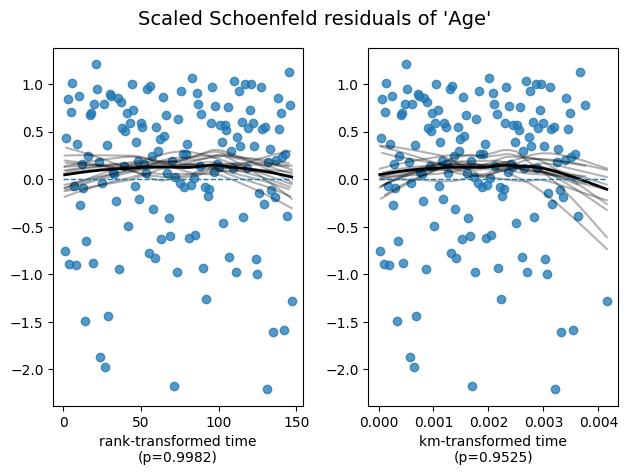

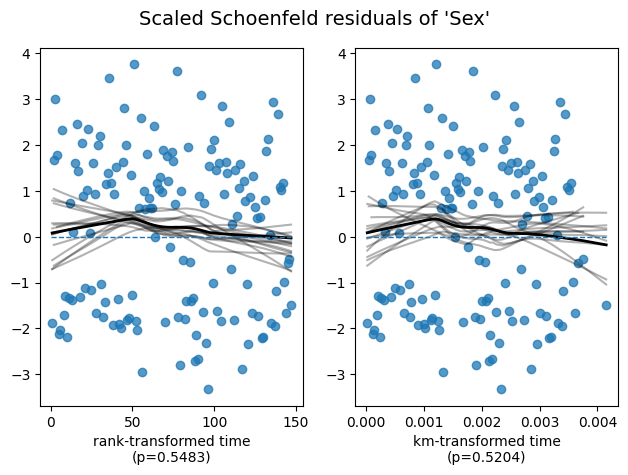

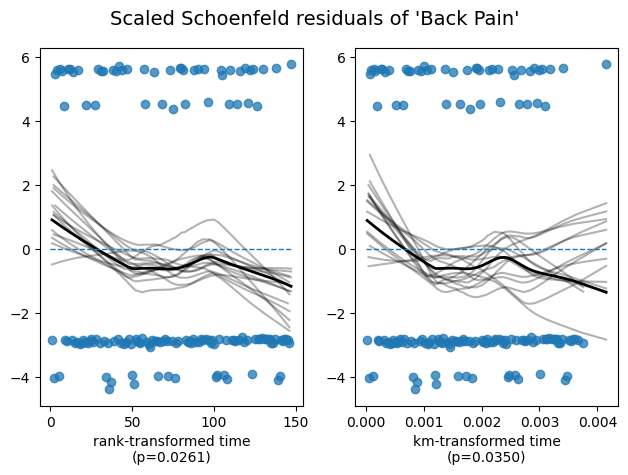

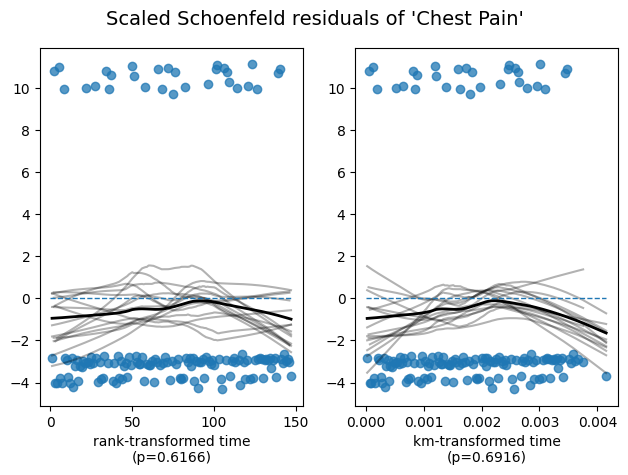

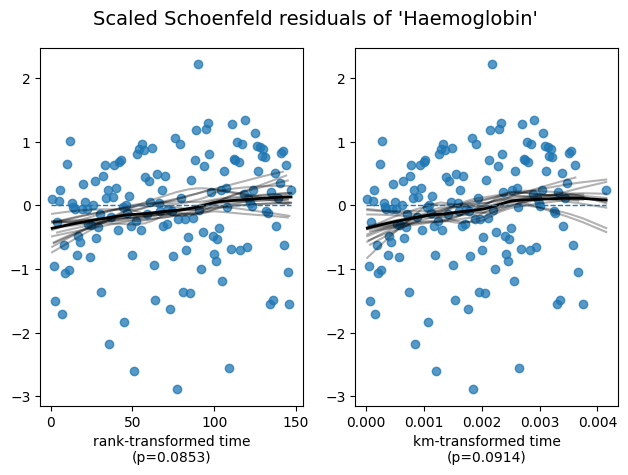

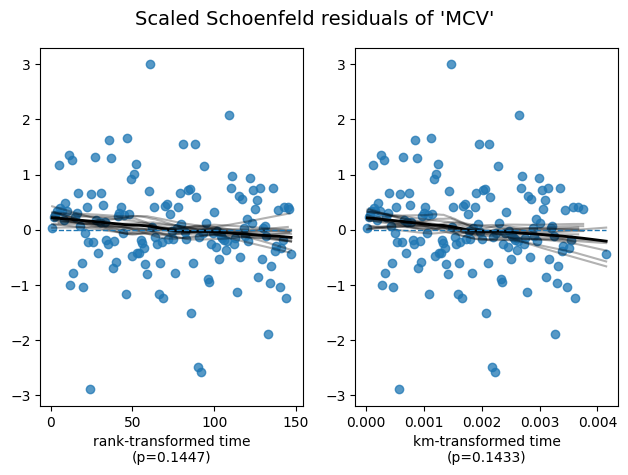

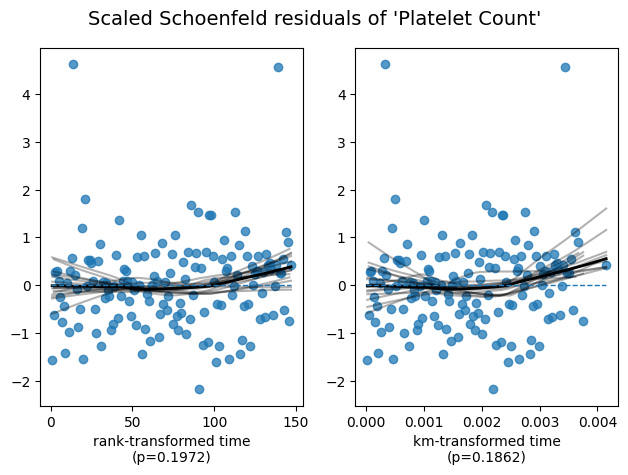

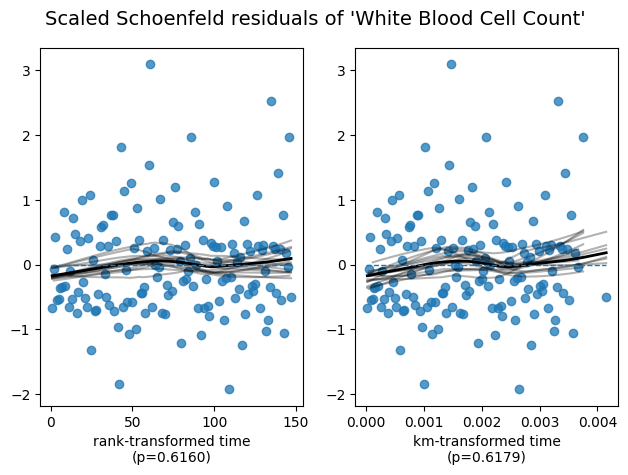

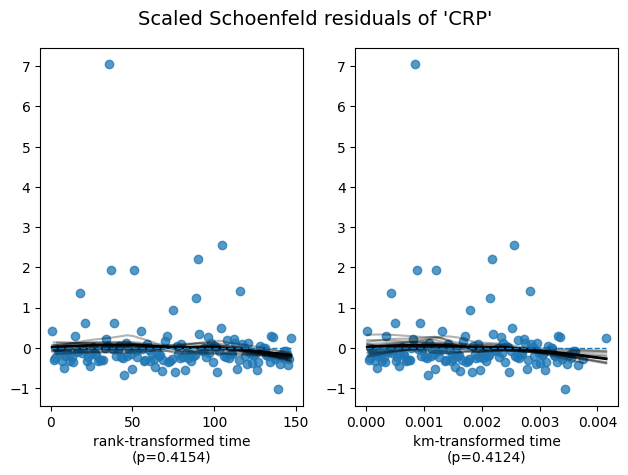

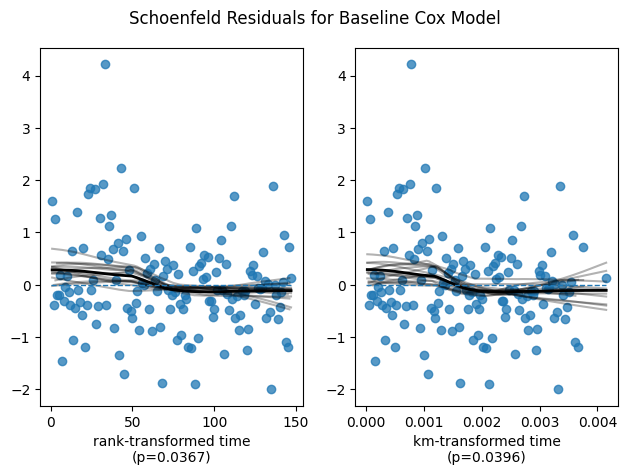


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

Proportional hazard assumption looks okay.


<Figure size 1200x800 with 0 Axes>

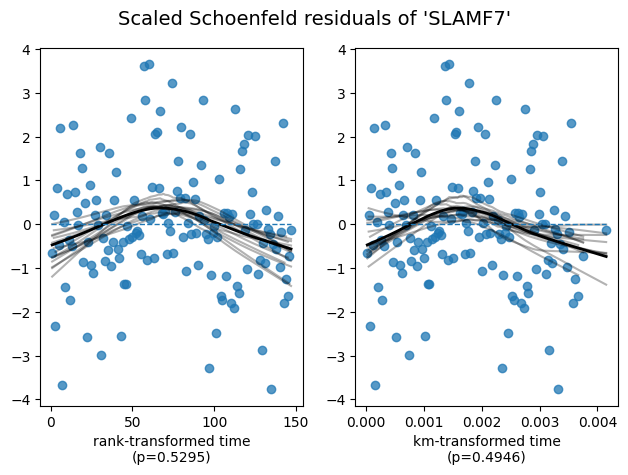

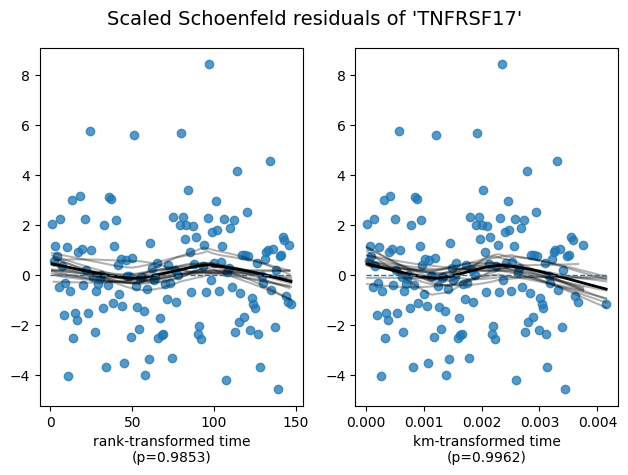

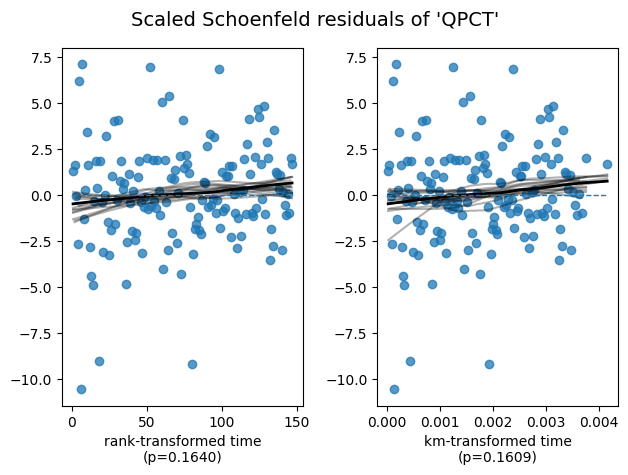

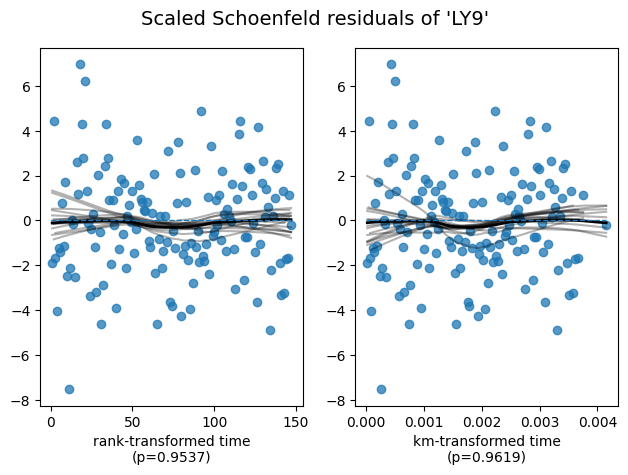

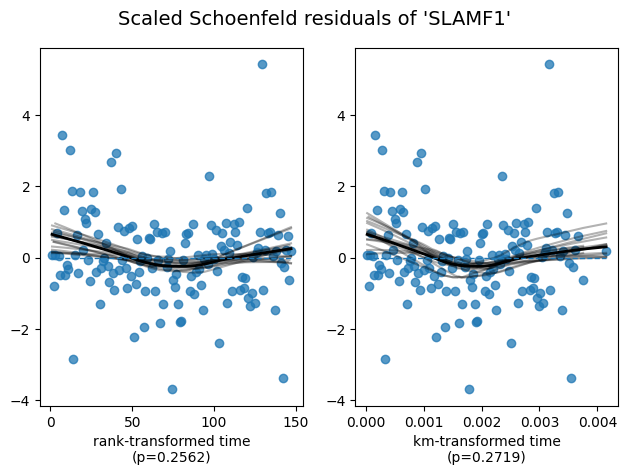

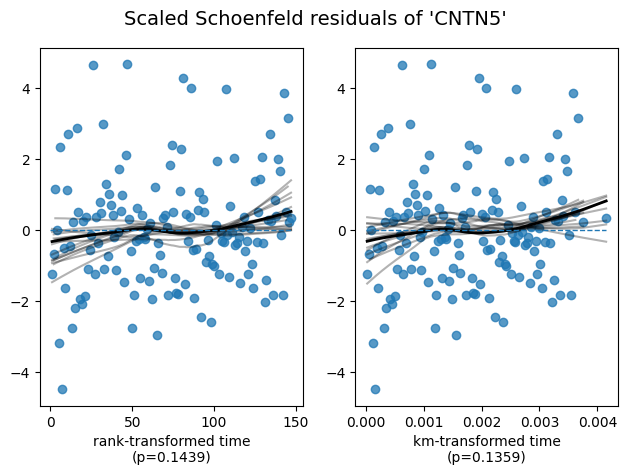

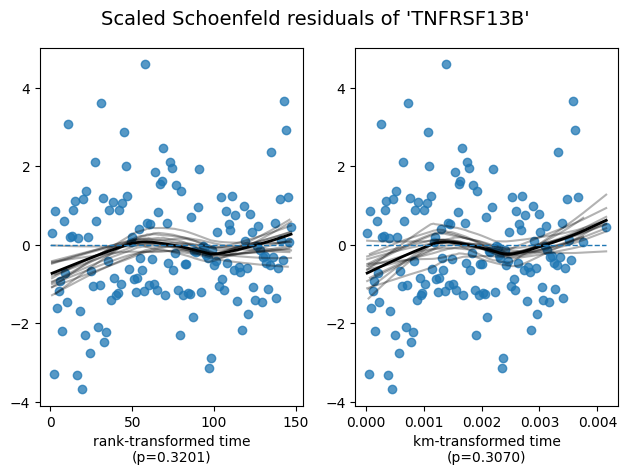

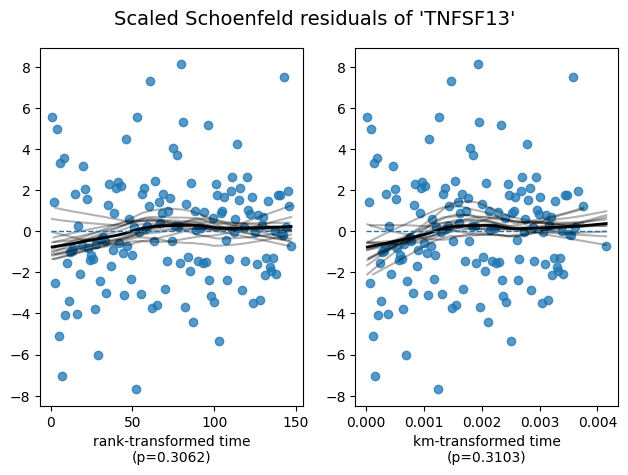

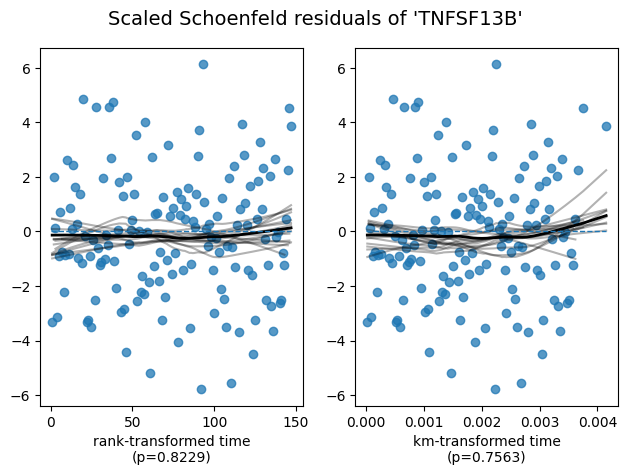

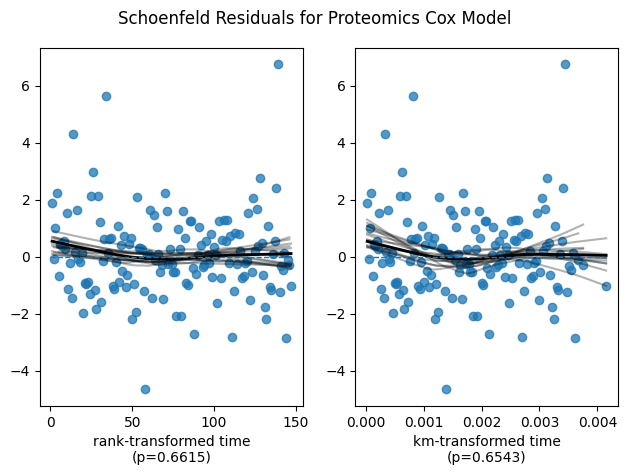


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produc

<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 42399 total observations, 42252 right-censored observations>
         test_name = proportional_hazard_test

---
                             test_statistic    p  -log2(p)
Age                    km              0.05 0.83      0.27
                       rank            0.08 0.77      0.37
Back Pain              km              0.30 0.58      0.78
                       rank            0.21 0.64      0.64
CNTN5                  km              2.51 0.11      3.14
                       rank            2.43 0.12      3.07
CRP                    km              0.94 0.33      1.59
                       rank            0.91 0.34      1.55
Calcium                km              3.66 0.06      4.16
                       rank            3.71 0.05      4.21
Chest Pain             km              1.24 0.27      1.91
                       rank            1.07 0.30      1.74
Haemoglobin            km              1.55 0.21      2.23
                       rank            1.65 0.20      2.33
LY9                    km              0.01 0.94      0.09
                       rank            0.00 0.95      0.08
MCV                    km              0.58 0.45      1.16
                       rank            0.56 0.45      1.14
Platelet Count         km              0.27 0.60      0.73
                       rank            0.22 0.64      0.65
QPCT                   km              1.58 0.21      2.26
                       rank            1.55 0.21      2.23
SLAMF1                 km              1.39 0.24      2.07
                       rank            1.52 0.22      2.20
SLAMF7                 km              0.58 0.44      1.17
                       rank            0.51 0.47      1.08
Sex                    km              0.46 0.50      1.01
                       rank            0.51 0.47      1.08
TIMP1                  km              0.05 0.82      0.28
                       rank            0.05 0.82      0.28
TNFRSF13B              km              1.61 0.20      2.29
                       rank            1.57 0.21      2.25
TNFRSF17               km              0.01 0.94      0.09
                       rank            0.01 0.92      0.12
TNFSF13                km              0.66 0.42      1.27
                       rank            0.66 0.42      1.27
TNFSF13B               km              0.98 0.32      1.64
                       rank            0.85 0.36      1.49
White Blood Cell Count km              0.05 0.81      0.30
                       rank            0.06 0.81      0.31



1. Variable 'Calcium' failed the non-proportional test: p-value is 0.0542.

   Advice 1: the functional form of the variable 'Calcium' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Calcium' using pd.cut, and then specify it in
`strata=['Calcium', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May

/gpfs3/well/clifton/users/ncu080/ukb_proteoml_mm/myeloma/lib/python3.11/site-packages/lifelines/fitters/mixins.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


<Figure size 1200x800 with 0 Axes>

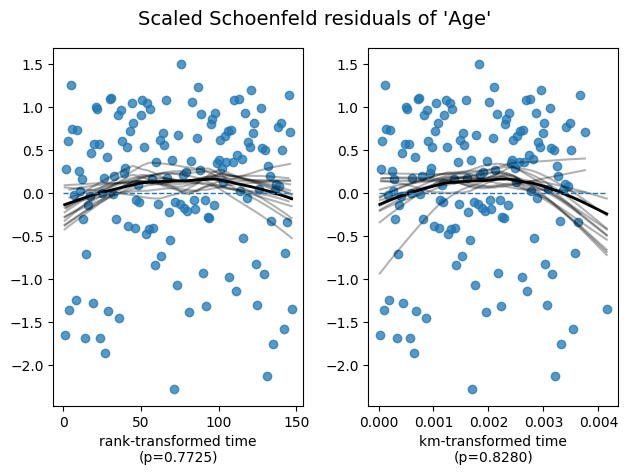

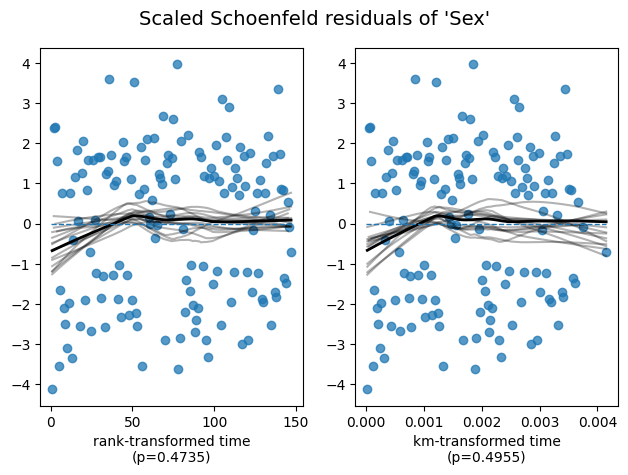

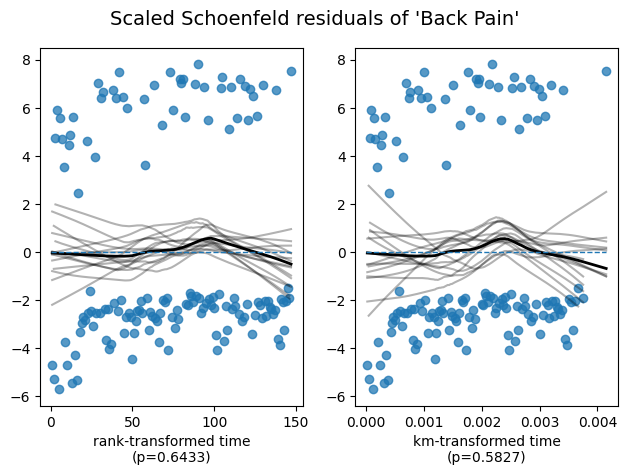

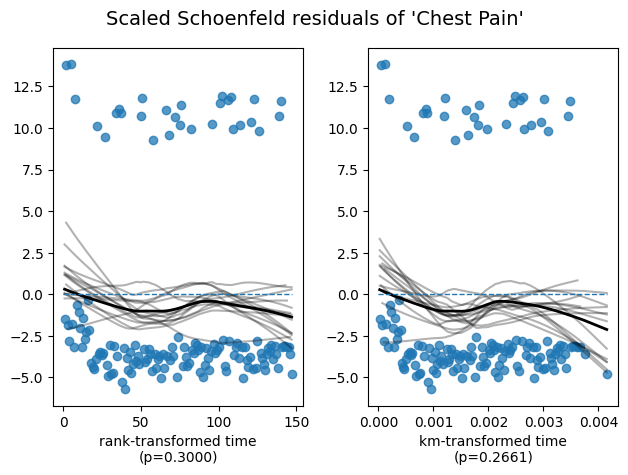

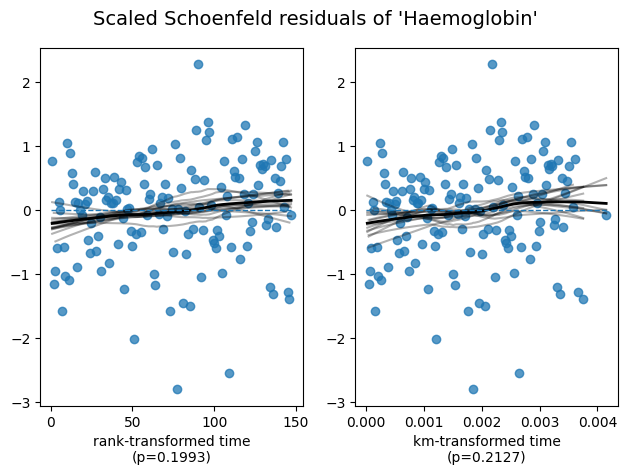

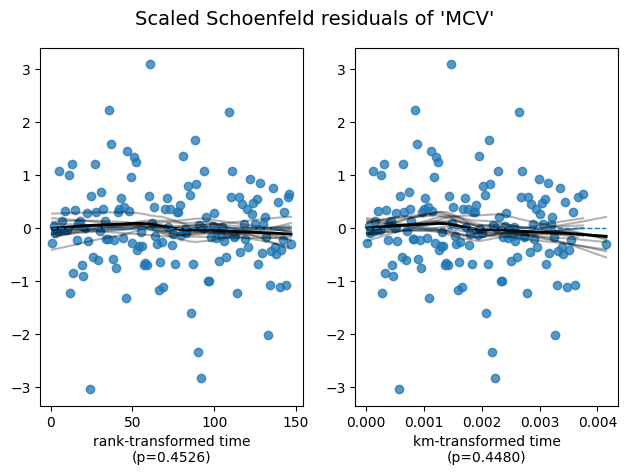

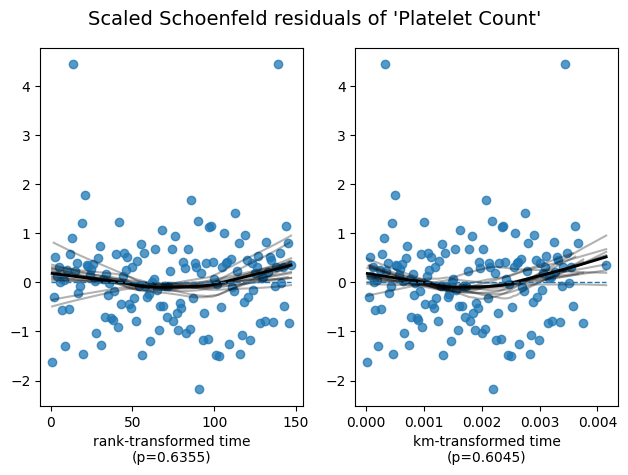

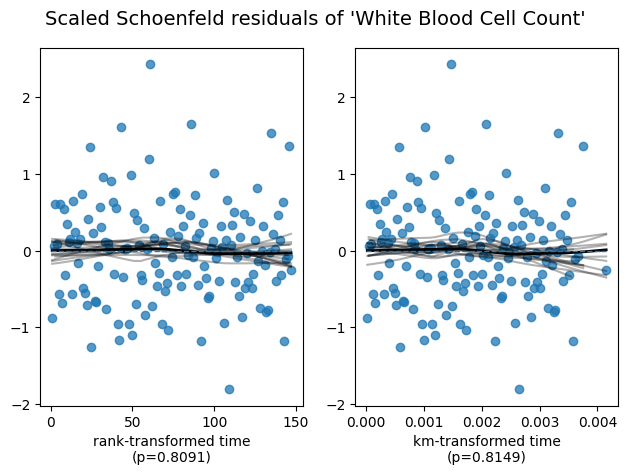

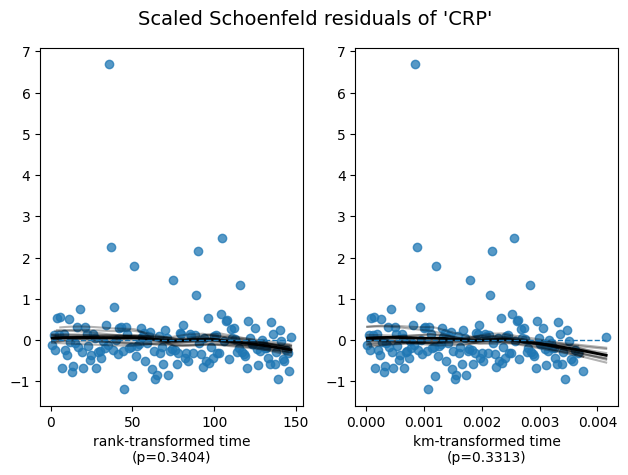

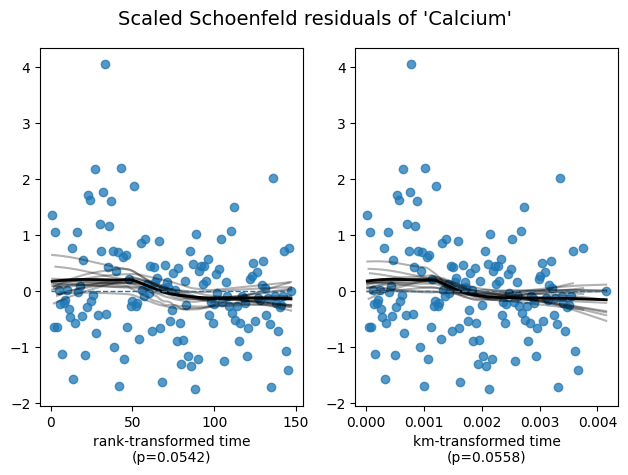

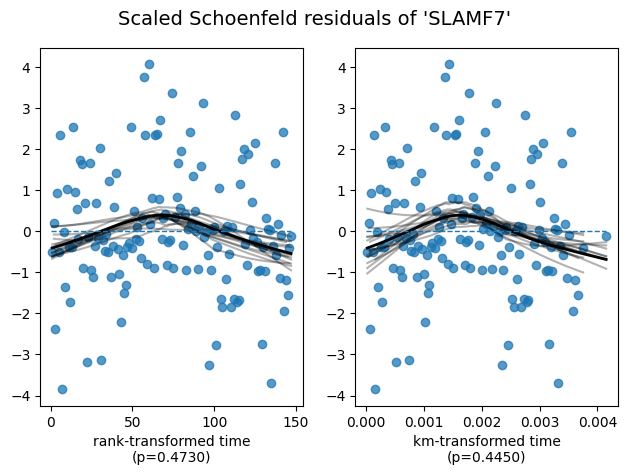

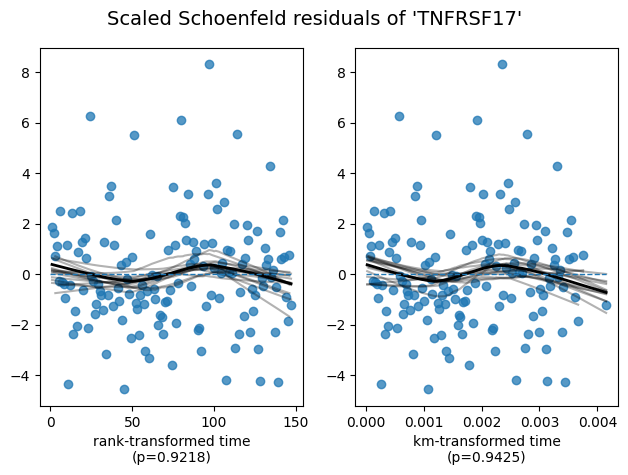

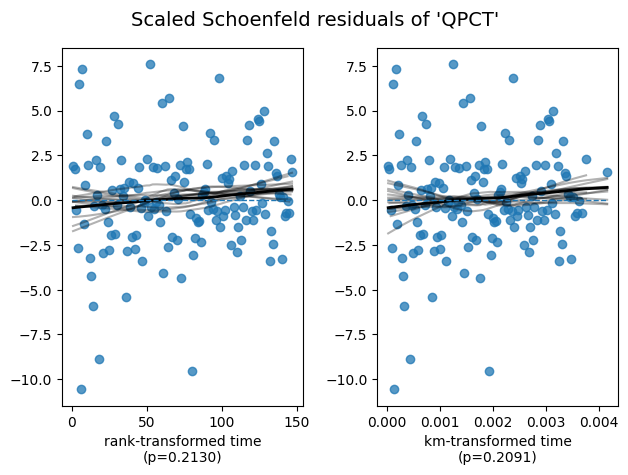

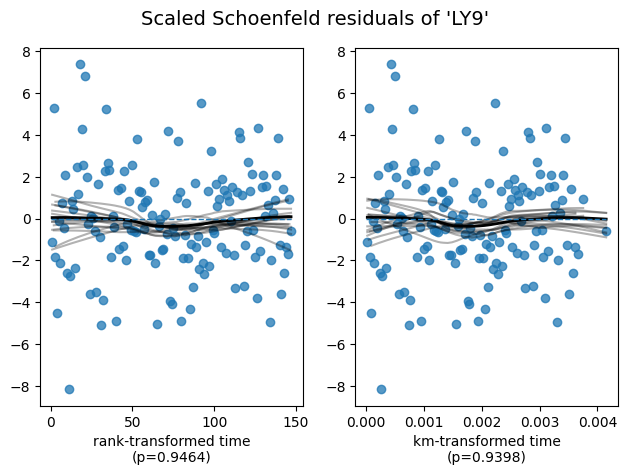

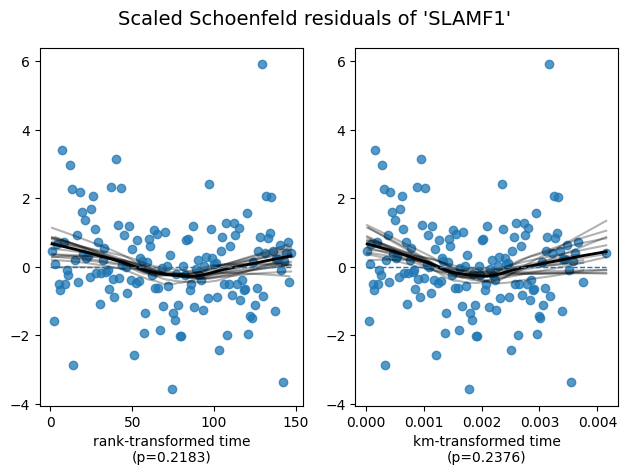

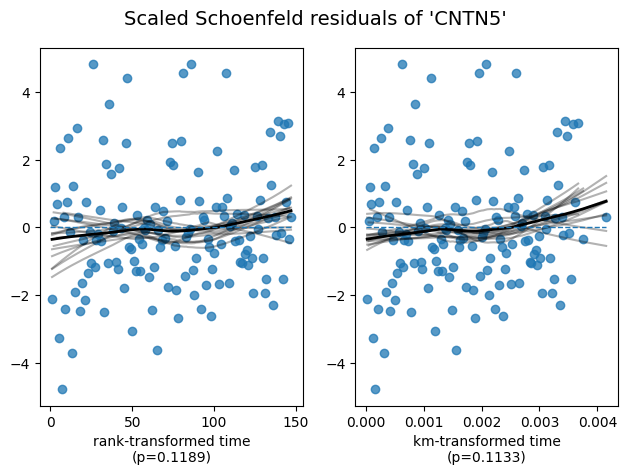

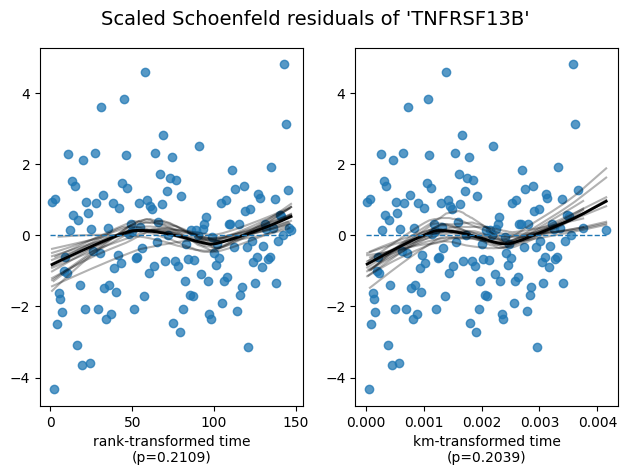

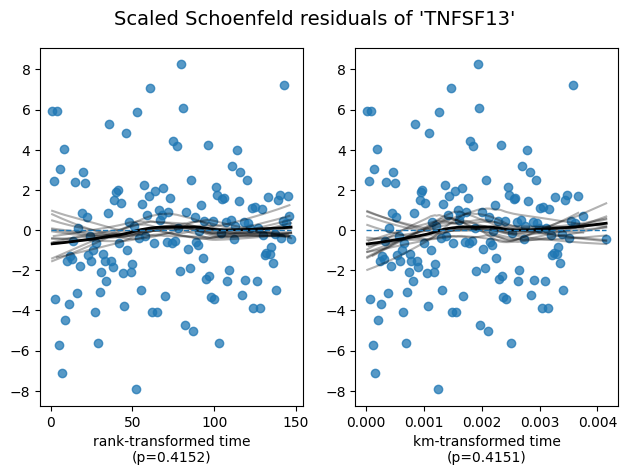

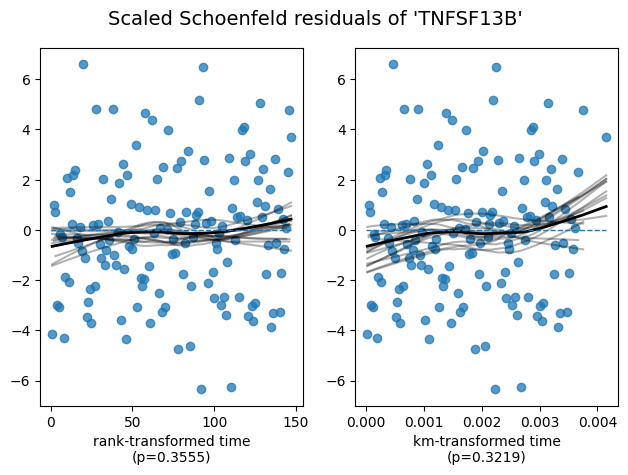

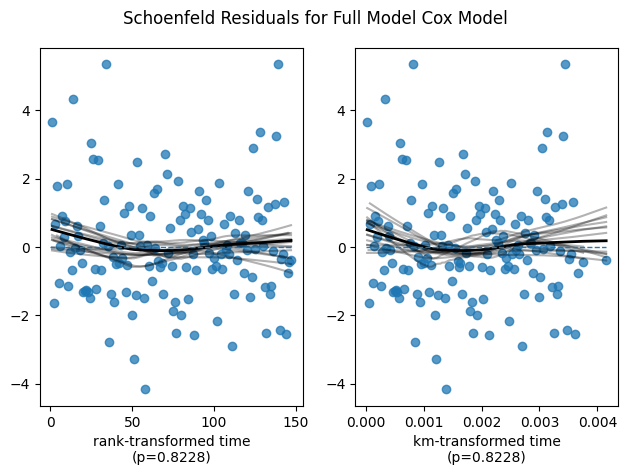

In [34]:
import matplotlib.pyplot as plt

# Function to plot Schoenfeld residuals
def plot_schoenfeld_residuals(cox_model, data, features, model_name):
    plt.figure(figsize=(12, 8))
    cox_model.check_assumptions(data[features + ['time', 'Myeloma']], p_value_threshold=0.05, show_plots=True)
    plt.suptitle(f'Schoenfeld Residuals for {model_name}')
    plt.show()

# Plot Schoenfeld residuals for each model
plot_schoenfeld_residuals(scaled_baseline_cox, train_scaled, baseline_features[:-2], "Baseline Cox Model")
plot_schoenfeld_residuals(scaled_proteomics_cox, train_scaled, proteomics_features[:-2], "Proteomics Cox Model")
plot_schoenfeld_residuals(scaled_full_model_cox, train_scaled, full_features[:-2], "Full Model Cox Model")


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produc

<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 42399 total observations, 42252 right-censored observations>
         test_name = proportional_hazard_test

---
                             test_statistic    p  -log2(p)
Age                    km              0.01 0.94      0.09
                       rank            0.00 0.99      0.02
Back Pain              km              0.83 0.36      1.47
                       rank            0.93 0.33      1.58
CRP                    km              0.70 0.40      1.31
                       rank            0.69 0.41      1.30
Calcium                km              4.25 0.04      4.68
                       rank            4.39 0.04      4.79
Chest Pain             km              0.02 0.90      0.15
                       rank            0.03 0.87      0.20
Haemoglobin            km              2.93 0.09      3.52
                       rank            3.04 0.08      3.62
MCV                    km              2.19 0.14      2.85
                       rank            2.18 0.14      2.83
Platelet Count         km              1.76 0.18      2.43
                       rank            1.67 0.20      2.35
Sex                    km              0.44 0.51      0.98
                       rank            0.38 0.54      0.90
White Blood Cell Count km              0.22 0.64      0.65
                       rank            0.23 0.63      0.66



1. Variable 'Calcium' failed the non-proportional test: p-value is 0.0362.

   Advice 1: the functional form of the variable 'Calcium' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Calcium' using pd.cut, and then specify it in
`strata=['Calcium', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Intr

<Figure size 1200x800 with 0 Axes>

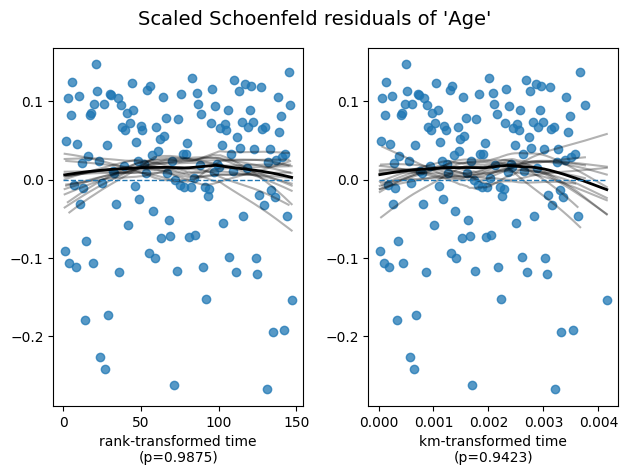

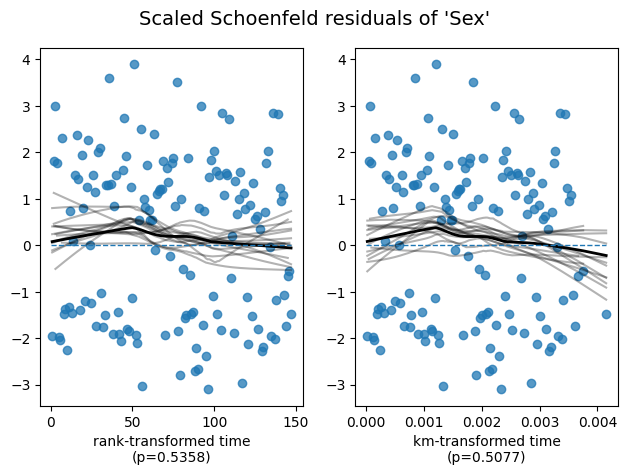

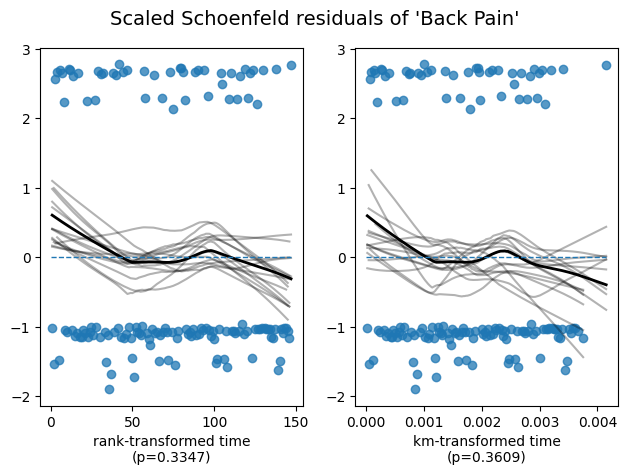

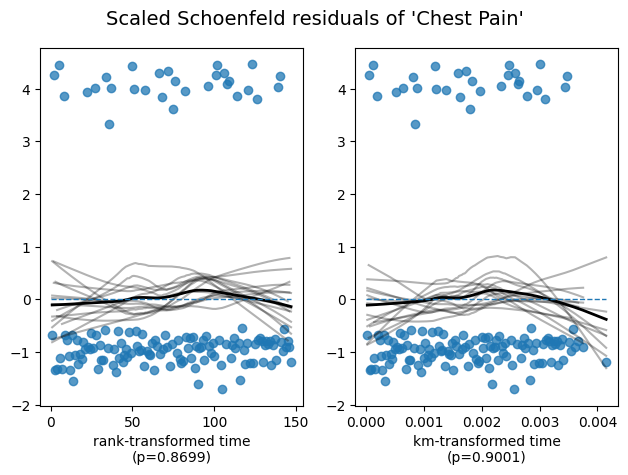

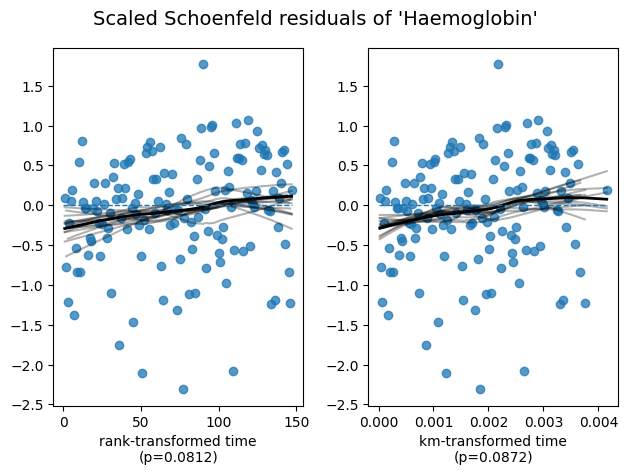

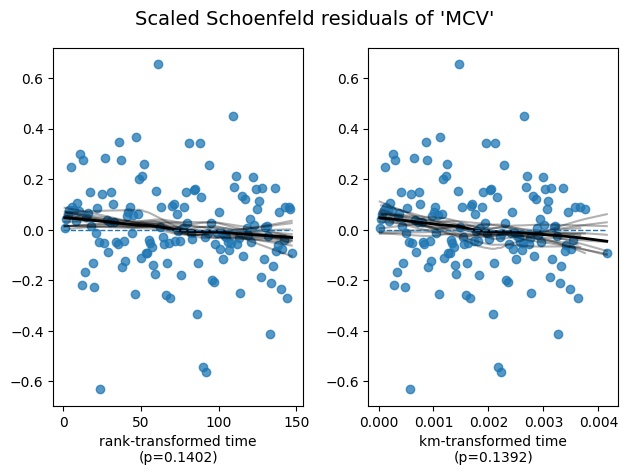

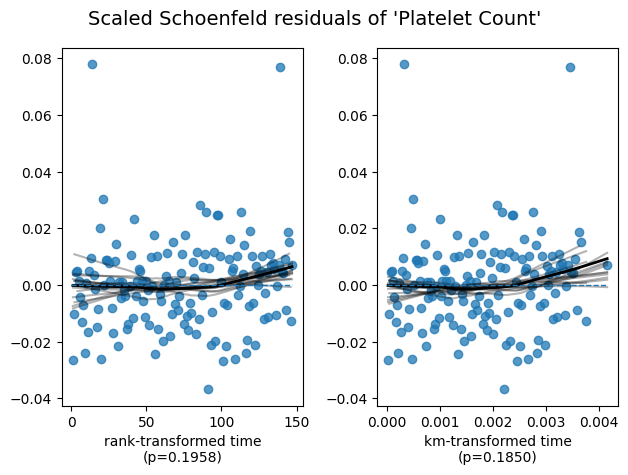

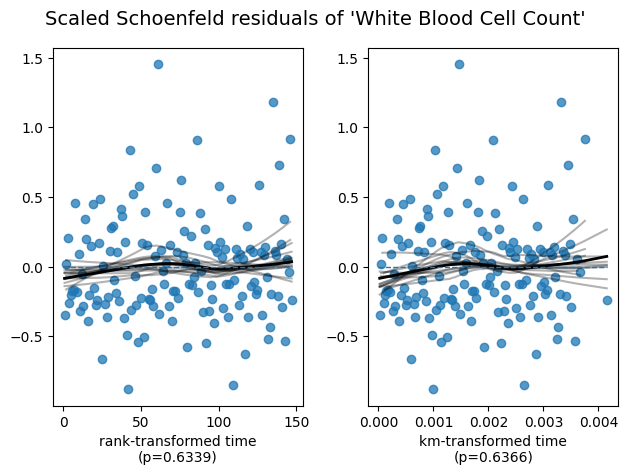

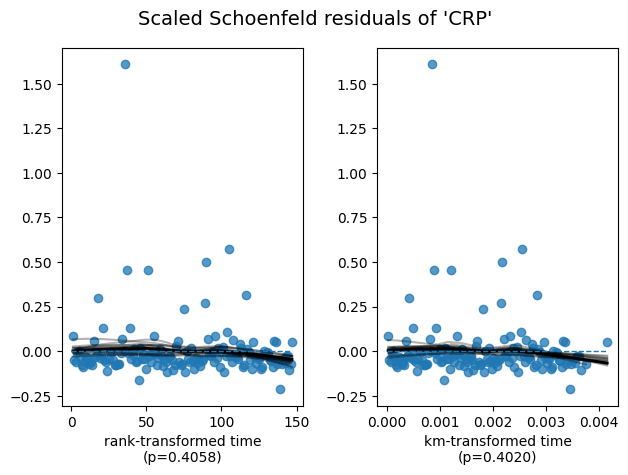

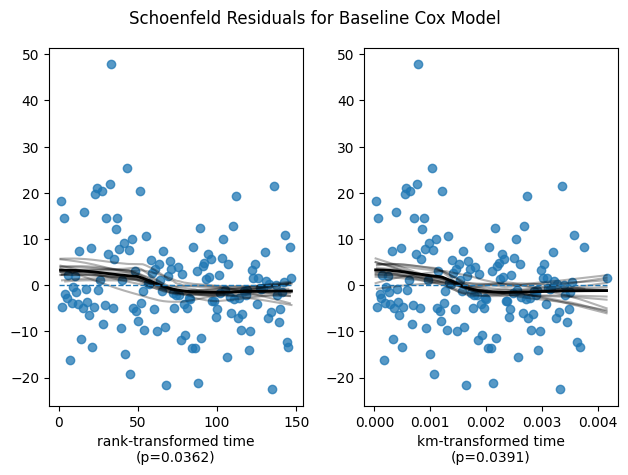


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

Proportional hazard assumption looks okay.


<Figure size 1200x800 with 0 Axes>

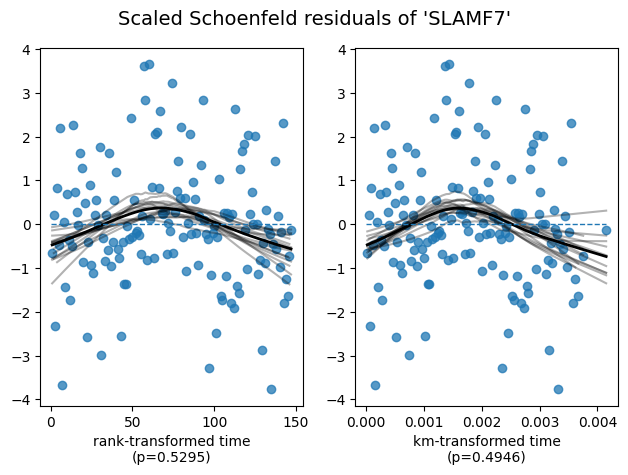

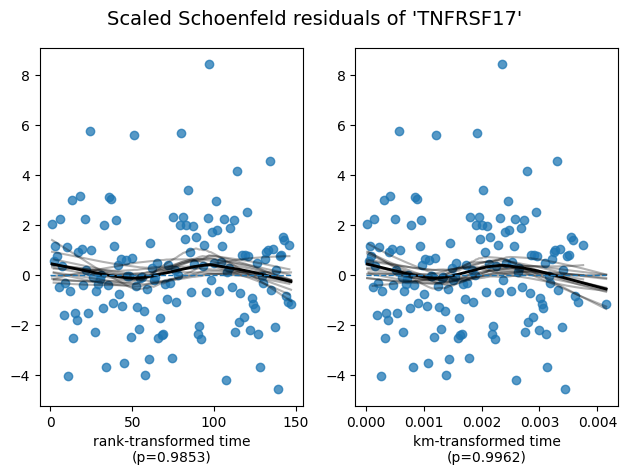

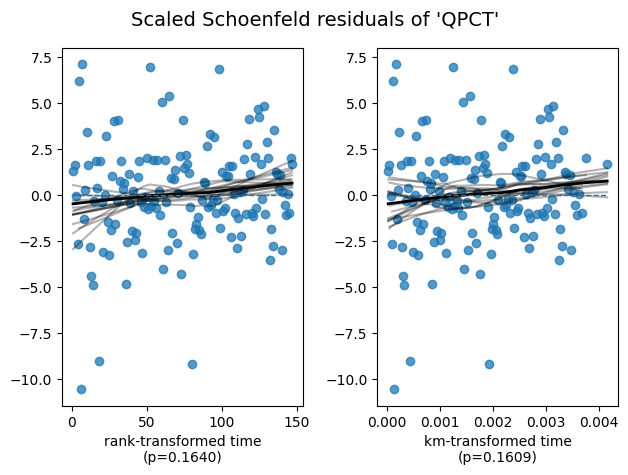

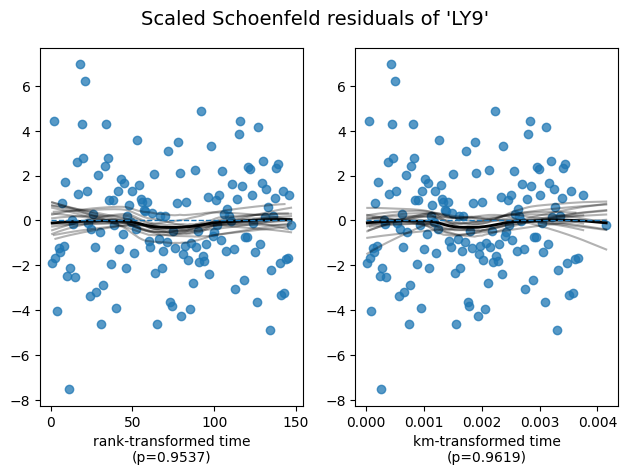

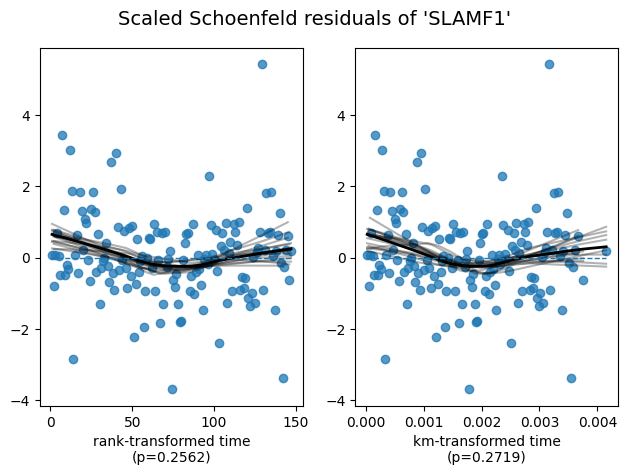

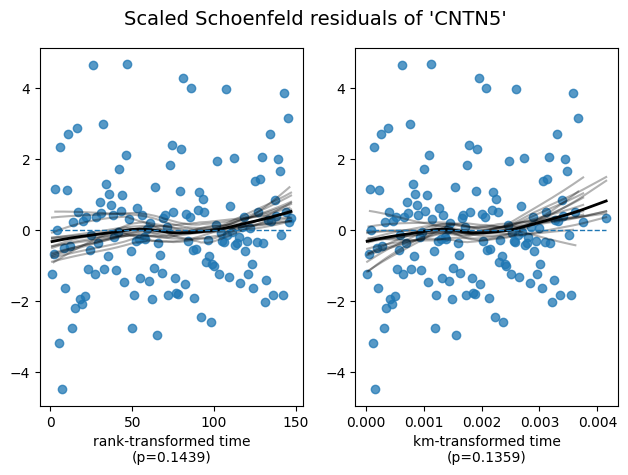

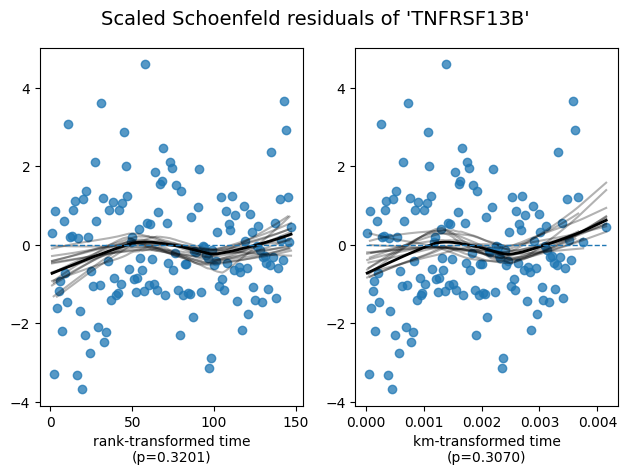

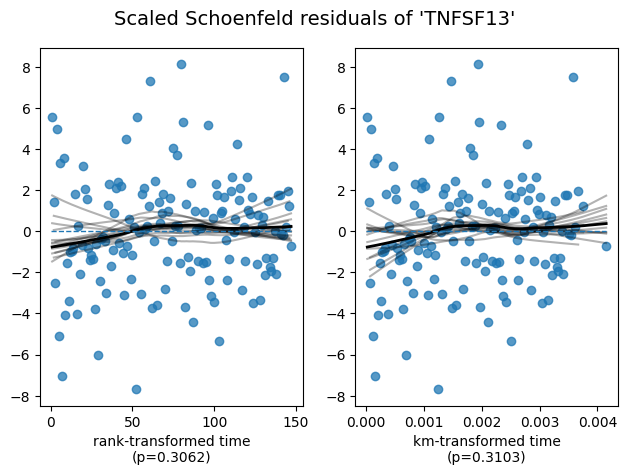

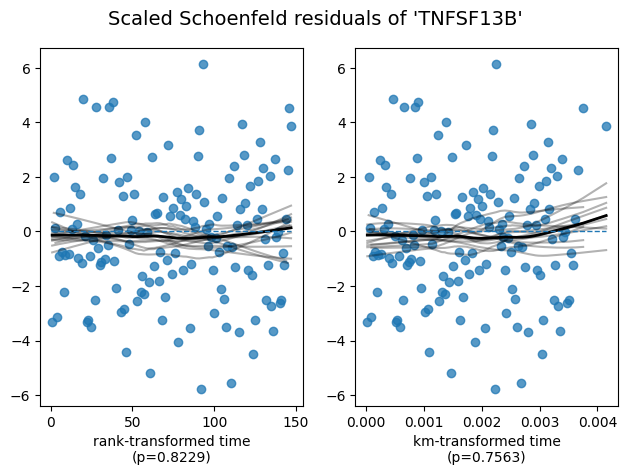

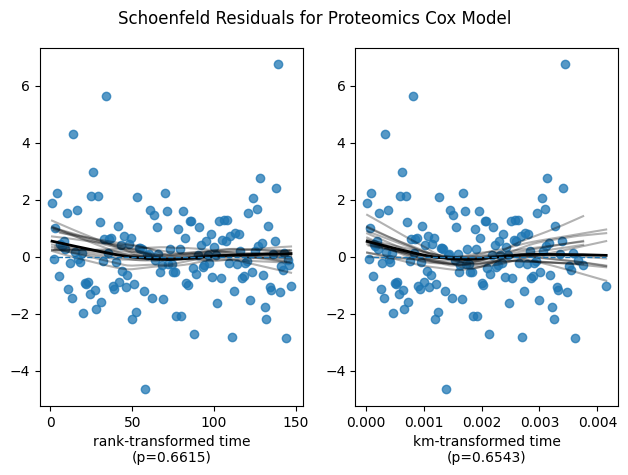


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produc

<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 42399 total observations, 42252 right-censored observations>
         test_name = proportional_hazard_test

---
                             test_statistic    p  -log2(p)
Age                    km              0.08 0.77      0.37
                       rank            0.13 0.72      0.48
Back Pain              km              0.00 0.99      0.01
                       rank            0.00 0.95      0.07
CNTN5                  km              2.79 0.09      3.40
                       rank            2.70 0.10      3.32
CRP                    km              0.99 0.32      1.65
                       rank            0.96 0.33      1.61
Calcium                km              3.70 0.05      4.20
                       rank            3.76 0.05      4.25
Chest Pain             km              0.05 0.82      0.29
                       rank            0.04 0.85      0.24
Haemoglobin            km              1.65 0.20      2.33
                       rank            1.75 0.19      2.43
LY9                    km              0.00 0.95      0.07
                       rank            0.00 0.94      0.08
MCV                    km              0.52 0.47      1.09
                       rank            0.52 0.47      1.08
Platelet Count         km              0.30 0.59      0.77
                       rank            0.25 0.62      0.70
QPCT                   km              1.70 0.19      2.37
                       rank            1.67 0.20      2.35
SLAMF1                 km              1.61 0.20      2.29
                       rank            1.74 0.19      2.41
SLAMF7                 km              0.68 0.41      1.28
                       rank            0.60 0.44      1.19
Sex                    km              0.44 0.51      0.98
                       rank            0.49 0.48      1.05
TIMP1                  km              0.12 0.73      0.45
                       rank            0.12 0.73      0.45
TNFRSF13B              km              1.43 0.23      2.11
                       rank            1.38 0.24      2.06
TNFRSF17               km              0.04 0.84      0.25
                       rank            0.05 0.82      0.28
TNFSF13                km              0.74 0.39      1.36
                       rank            0.74 0.39      1.35
TNFSF13B               km              0.81 0.37      1.45
                       rank            0.70 0.40      1.31
White Blood Cell Count km              0.10 0.76      0.40
                       rank            0.10 0.75      0.41



1. Variable 'Calcium' failed the non-proportional test: p-value is 0.0526.

   Advice 1: the functional form of the variable 'Calcium' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Calcium' using pd.cut, and then specify it in
`strata=['Calcium', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May

/gpfs3/well/clifton/users/ncu080/ukb_proteoml_mm/myeloma/lib/python3.11/site-packages/lifelines/fitters/mixins.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


<Figure size 1200x800 with 0 Axes>

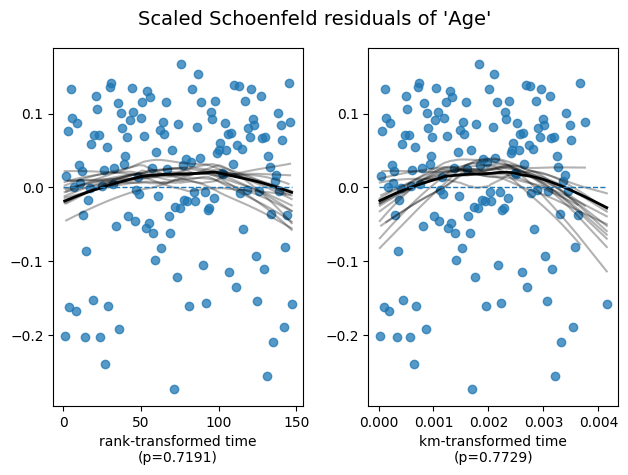

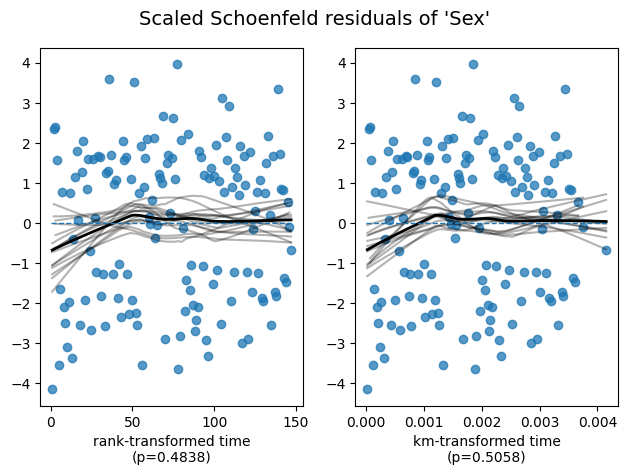

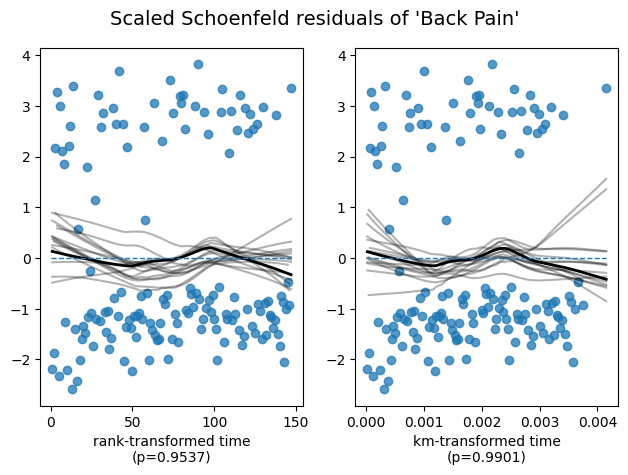

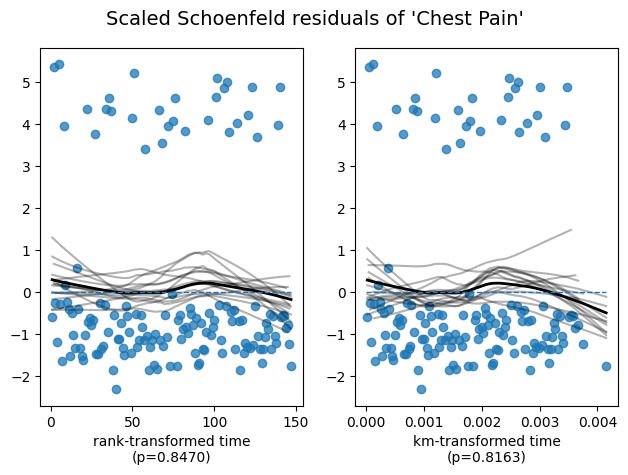

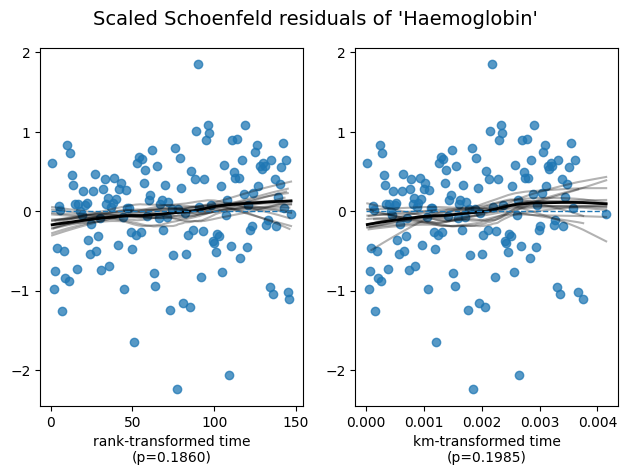

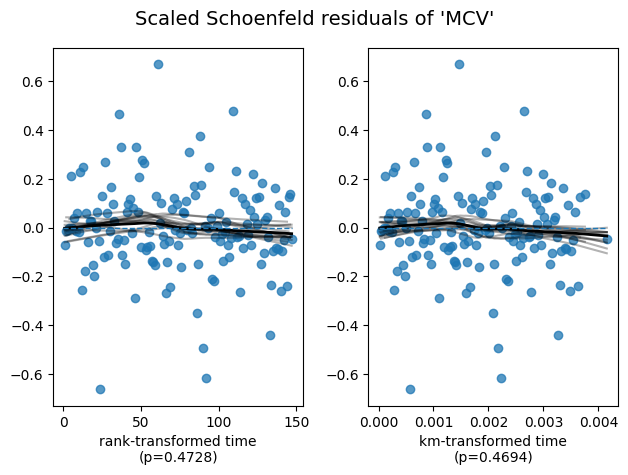

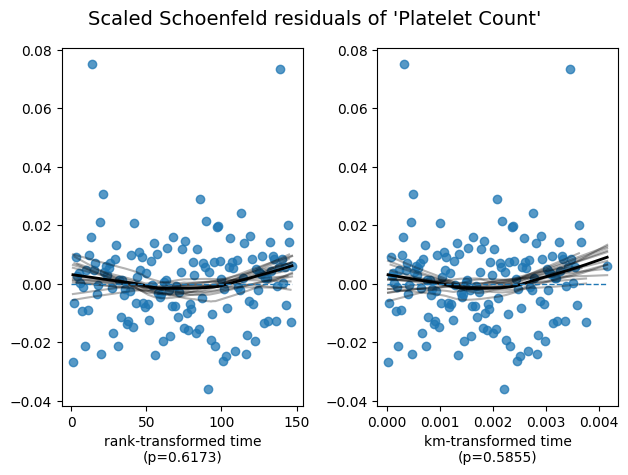

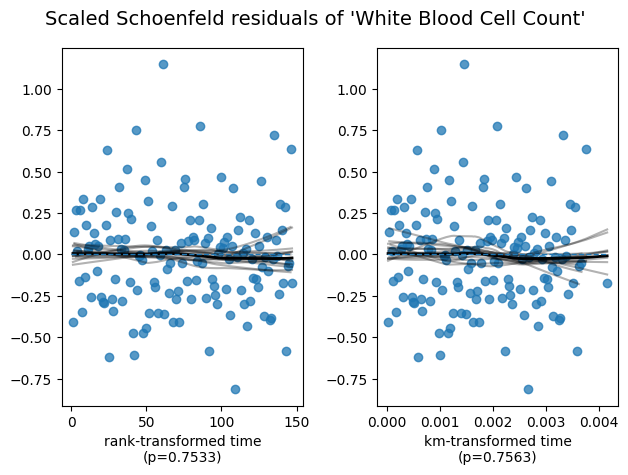

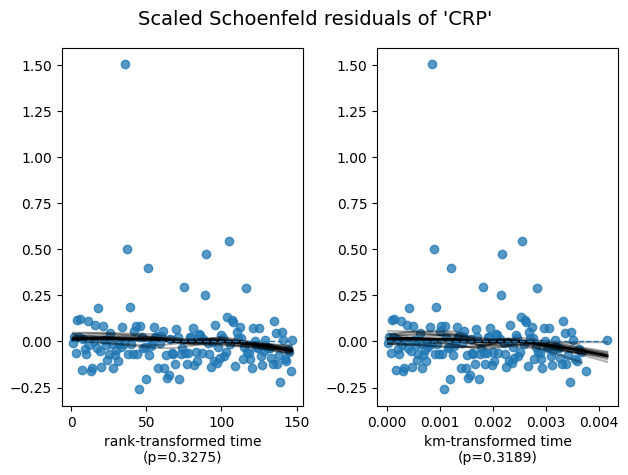

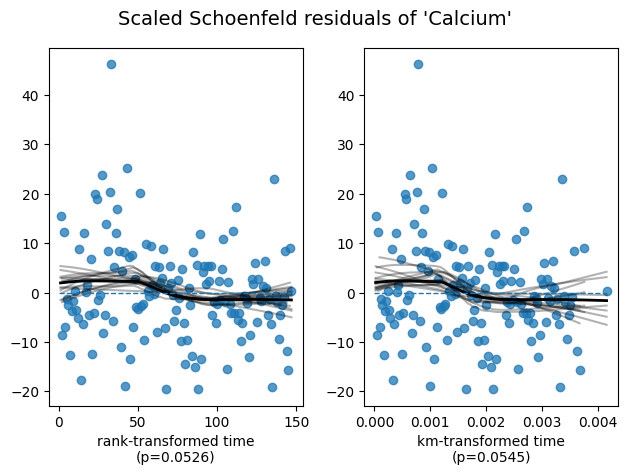

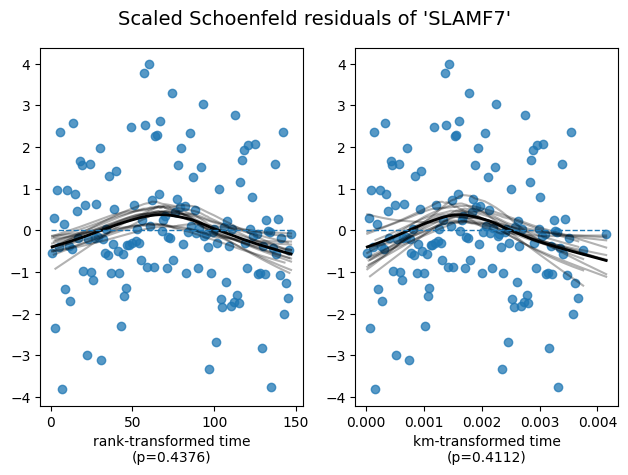

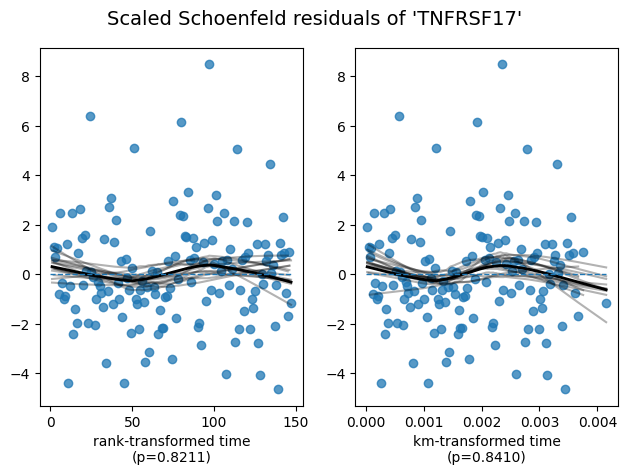

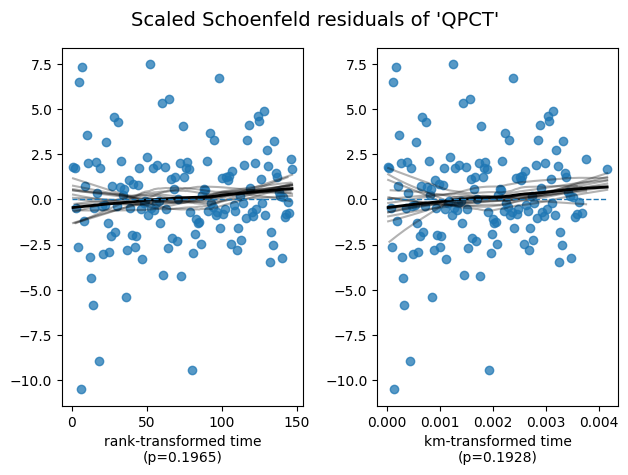

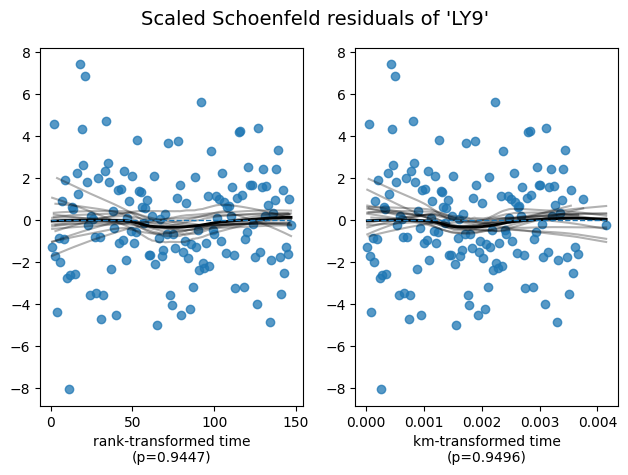

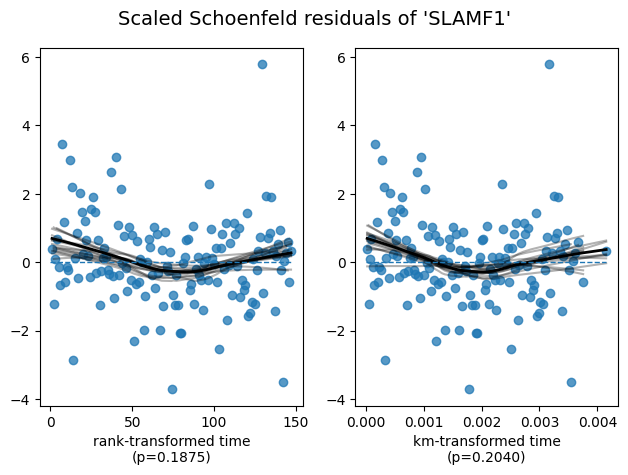

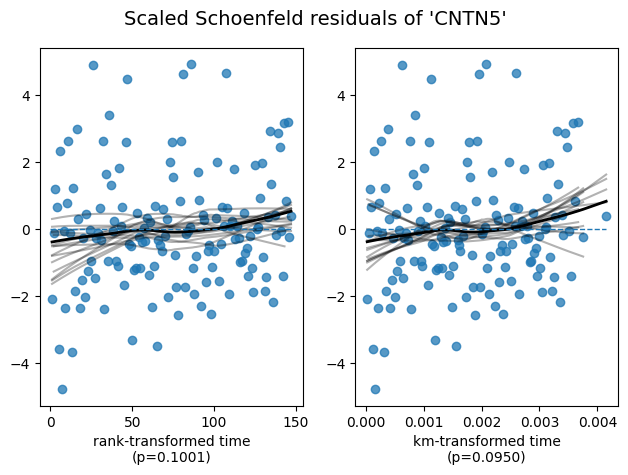

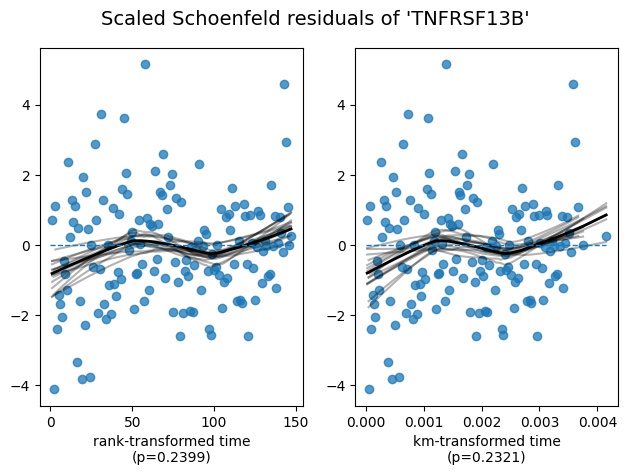

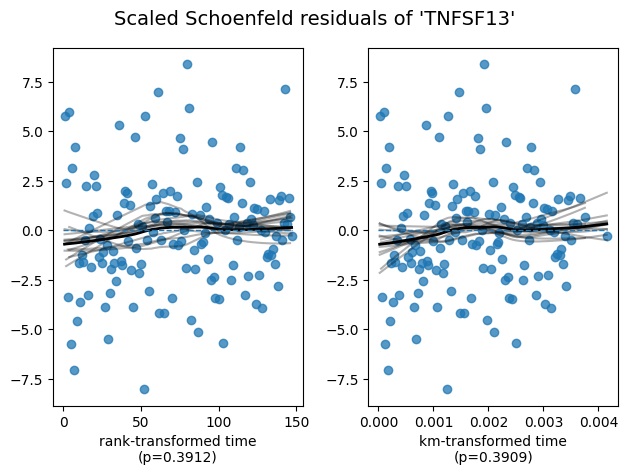

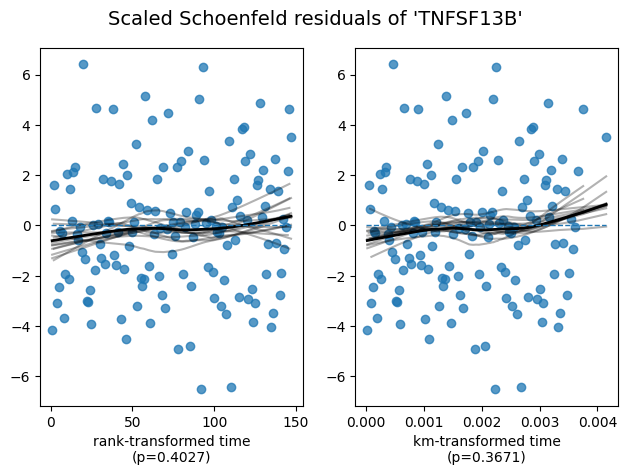

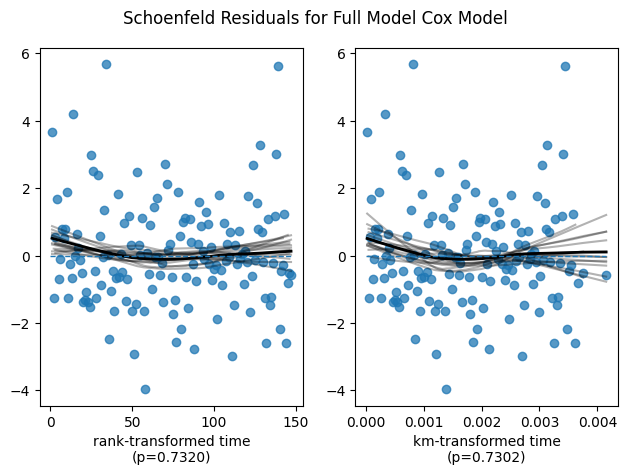

In [35]:
import matplotlib.pyplot as plt

# Function to plot Schoenfeld residuals
def plot_schoenfeld_residuals(cox_model, data, features, model_name):
    plt.figure(figsize=(12, 8))
    cox_model.check_assumptions(data[features + ['time', 'Myeloma']], p_value_threshold=0.05, show_plots=True)
    plt.suptitle(f'Schoenfeld Residuals for {model_name}')
    plt.show()

# Plot Schoenfeld residuals for each model
plot_schoenfeld_residuals(baseline_cox, train, baseline_features[:-2], "Baseline Cox Model")
plot_schoenfeld_residuals(proteomics_cox, train, proteomics_features[:-2], "Proteomics Cox Model")
plot_schoenfeld_residuals(full_model_cox, train, full_features[:-2], "Full Model Cox Model")

## Cox performace metrics

### C index on test and train

In [14]:
from lifelines.utils import concordance_index

# Get C-index for the training data
train_cindex_baseline = scaled_baseline_cox.concordance_index_
train_cindex_proteomics = scaled_proteomics_cox.concordance_index_
train_cindex_full = scaled_full_model_cox.concordance_index_

print(f"Concordance Index (Baseline_Model) on Training Data: {train_cindex_baseline:.4f}")
print(f"Concordance Index (Proteomics_Model) on Training Data: {train_cindex_proteomics:.4f}")
print(f"Concordance Index (Full_Model) on Training Data: {train_cindex_full:.4f}")

# Compute C-index for the test data
# Ensure the test datasets have the same structure as the training datasets
train_baseline = train_scaled[baseline_features]
train_proteomics = train_scaled[proteomics_features]
train_full = train_scaled[full_features]

test_baseline = test_scaled[baseline_features]
test_proteomics = test_scaled[proteomics_features]
test_full = test_scaled[full_features]

# Predict partial hazards for the test dataset
partial_hazard_baseline = scaled_baseline_cox.predict_partial_hazard(test_baseline)
partial_hazard_proteomics = scaled_proteomics_cox.predict_partial_hazard(test_proteomics)
partial_hazard_full = scaled_full_model_cox.predict_partial_hazard(test_full)

# Compute C-index for test data
test_cindex_baseline = concordance_index(test['time'], -partial_hazard_baseline, test['Myeloma'])
test_cindex_proteomics = concordance_index(test['time'], -partial_hazard_proteomics, test['Myeloma'])
test_cindex_full = concordance_index(test['time'], -partial_hazard_full, test['Myeloma'])

print(f"Concordance Index (Baseline_Model) on Test Data: {test_cindex_baseline:.4f}")
print(f"Concordance Index (Proteomics_Model) on Test Data: {test_cindex_proteomics:.4f}")
print(f"Concordance Index (Full_Model) on Test Data: {test_cindex_full:.4f}")

Concordance Index (Baseline_Model) on Training Data: 0.6894
Concordance Index (Proteomics_Model) on Training Data: 0.8603
Concordance Index (Full_Model) on Training Data: 0.8673
Concordance Index (Baseline_Model) on Test Data: 0.6711
Concordance Index (Proteomics_Model) on Test Data: 0.8991
Concordance Index (Full_Model) on Test Data: 0.8985


### Time varying AUROC

C-index for Clinical Cox Model on Test Data: 0.6711
C-index for Proteomics Cox Model on Test Data: 0.8991
C-index for Combined Cox Model on Test Data: 0.8985
C-index for Clinical Cox Model on Training Data: 0.6894
C-index for Proteomics Cox Model on Training Data: 0.8603
C-index for Combined Cox Model on Training Data: 0.8673


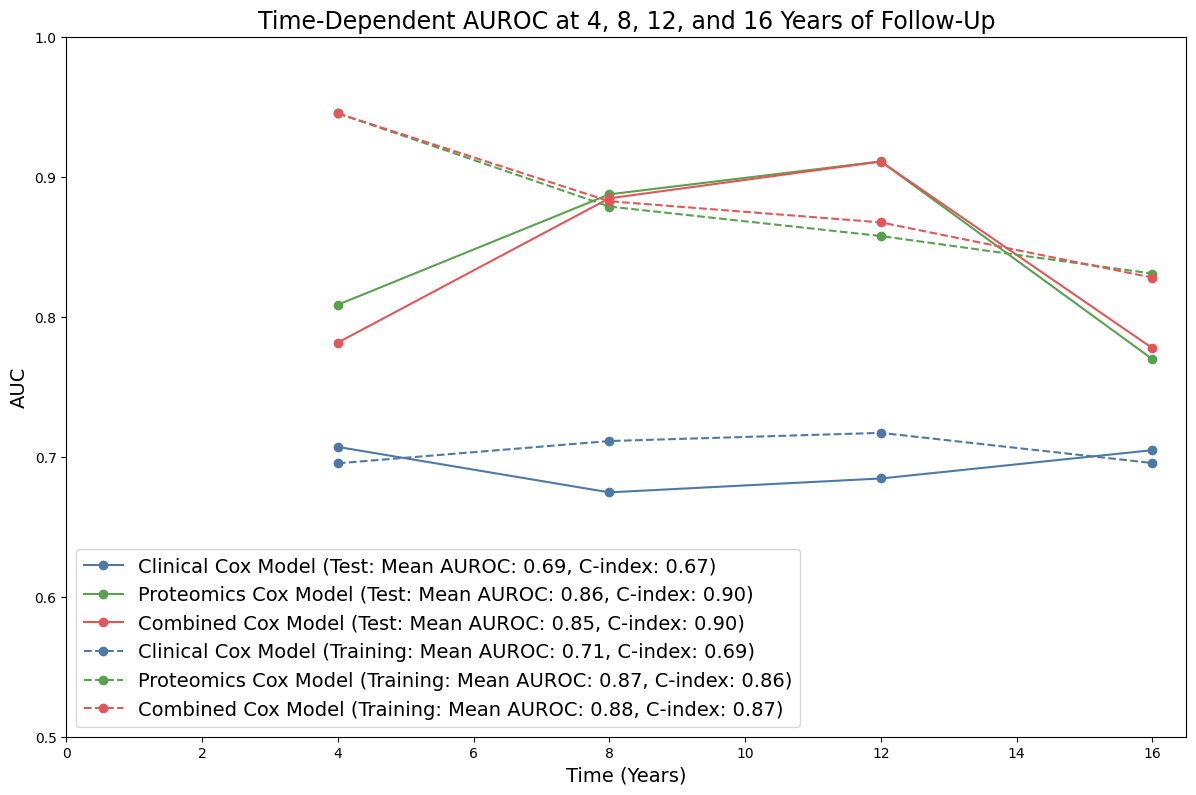

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.metrics import cumulative_dynamic_auc
from lifelines.utils import concordance_index

def calculate_and_plot_auroc(cph_model, train_data_encoded, test_data_encoded, train_data, test_data, label, dataset_type="Test", color=None):
    # Select appropriate dataset
    if dataset_type == "Training":
        data_encoded = train_data_encoded
        data_scaled = train_data
        y_structured_source = train_scaled
        linestyle = '--'  # Dashed line for Training
    else:
        data_encoded = test_data_encoded
        data_scaled = test_data
        y_structured_source = test_scaled
        linestyle = '-'  # Solid line for Test

    # Calculate the risk scores for the selected dataset using the Cox model
    risk_scores = cph_model.predict_partial_hazard(data_encoded)

    # Extract the event times and event indicators
    y_time = data_scaled['time']
    y_status = data_scaled['Myeloma']

    # Calculate the C-index
    c_index = concordance_index(y_time, -risk_scores, event_observed=y_status)
    print(f'C-index for {label} on {dataset_type} Data: {c_index:.4f}')

    # Prepare the structured arrays for sksurv
    y_structured = np.array([(bool(status), time) for status, time in zip(y_structured_source['Myeloma'], y_structured_source['time'])],
                            dtype=[('event', '?'), ('time', '<f8')])

    # Define time points for the AUC calculation
    specified_time_points = np.array([4, 8, 12, 16])

    # Calculate time-dependent AUROC using cumulative_dynamic_auc
    auc_scores, mean_auc = cumulative_dynamic_auc(y_structured, y_structured, risk_scores, specified_time_points)

    # Plot AUC over time
    plt.plot(specified_time_points, auc_scores, marker='o', label=f'{label} ({dataset_type}: Mean AUROC: {mean_auc:.2f}, C-index: {c_index:.2f})', linestyle=linestyle, color=color)

    # Return mean AUROC and C-index for reporting
    return mean_auc, c_index, auc_scores, specified_time_points

# Example usage for the three models:
plt.figure(figsize=(16, 10))

# Define Nature-inspired colors for consistency between Training and Test lines
nature_colors = {
    "Clinical Cox Model": "#4E79A7",  # Blue
    "Proteomics Cox Model": "#59A14F",  # Green
    "Combined Cox Model": "#E15759"  # Red
}

# Plot AUROC for Test Data
mean_auc_baseline_test, c_index_baseline_test, auc_baseline_test, times_baseline_test = calculate_and_plot_auroc(
    scaled_baseline_cox, train_baseline, test_baseline, train_scaled, test_scaled, "Clinical Cox Model", "Test", color=nature_colors["Clinical Cox Model"]
)

mean_auc_proteomics_test, c_index_proteomics_test, auc_proteomics_test, times_proteomics_test = calculate_and_plot_auroc(
    scaled_proteomics_cox, train_proteomics, test_proteomics, train_scaled, test_scaled, "Proteomics Cox Model", "Test", color=nature_colors["Proteomics Cox Model"]
)

mean_auc_full_test, c_index_full_test, auc_full_test, times_full_test = calculate_and_plot_auroc(
    scaled_full_model_cox, train_full, test_full, train_scaled, test_scaled, "Combined Cox Model", "Test", color=nature_colors["Combined Cox Model"]
)

# Plot AUROC for Training Data
mean_auc_baseline_training, c_index_baseline_training, auc_baseline_training, times_baseline_training = calculate_and_plot_auroc(
    scaled_baseline_cox, train_baseline, test_baseline, train_scaled, test_scaled, "Clinical Cox Model", "Training", color=nature_colors["Clinical Cox Model"]
)

mean_auc_proteomics_training, c_index_proteomics_training, auc_proteomics_training, times_proteomics_training = calculate_and_plot_auroc(
    scaled_proteomics_cox, train_proteomics, test_proteomics, train_scaled, test_scaled, "Proteomics Cox Model", "Training", color=nature_colors["Proteomics Cox Model"]
)

mean_auc_full_training, c_index_full_training, auc_full_training, times_full_training = calculate_and_plot_auroc(
    scaled_full_model_cox, train_full, test_full, train_scaled, test_scaled, "Combined Cox Model", "Training", color=nature_colors["Combined Cox Model"]
)

# Customize plot
plt.title("Time-Dependent AUROC at 4, 8, 12, and 16 Years of Follow-Up", fontsize=17)
plt.xlabel("Time (Years)", fontsize=14)
plt.ylabel("AUC", fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15) 
# Set time axis from 0 to 16.5 and AUC axis from 0.5 to 1.0
plt.xlim(0, 16.5)  # X-axis goes from 0 to 16.5 (time)
plt.ylim(0.5, 1.0)  # Y-axis goes from 0.5 to 1.0 (AUC)
plt.show()


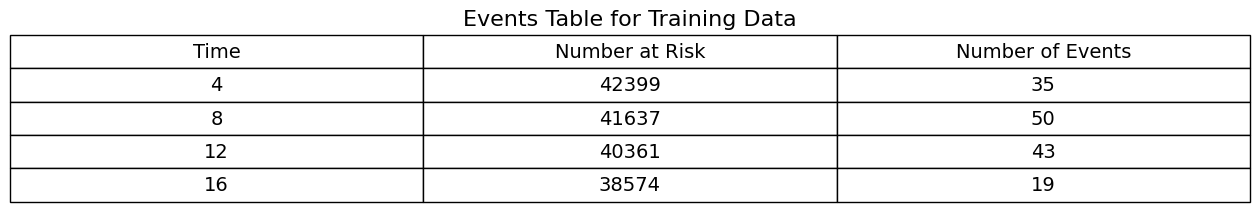

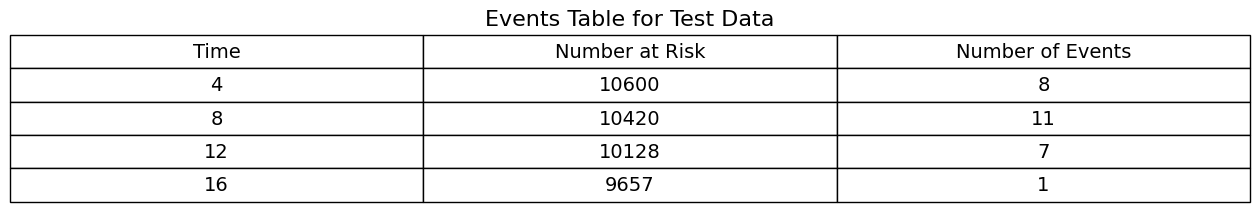

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to generate the table for a dataset
def create_table(data, dataset_name):
    specified_time_points = np.array([4, 8, 12, 16])
    y_time = data['time']
    y_status = data['Myeloma']

    # Prepare the events data to display in the table
    events_in_bins = []
    for i in range(len(specified_time_points)):
        if i == 0:
            # First time bin: from time 0 to specified_time_points[0]
            events_count = np.sum((y_time <= specified_time_points[i]) & (y_status == True))
            at_risk_count = np.sum(y_time >= 0)
        else:
            # Subsequent time bins
            events_count = np.sum((y_time > specified_time_points[i-1]) & (y_time <= specified_time_points[i]) & (y_status == True))
            at_risk_count = np.sum(y_time >= specified_time_points[i-1])
        
        # Store the results in the table
        events_in_bins.append({
            'Time': specified_time_points[i],
            'Number at Risk': at_risk_count,
            'Number of Events': events_count
        })

    events_df = pd.DataFrame(events_in_bins)

    # Create and save the table
    fig, ax = plt.subplots(figsize=(16, 2.2))  # Set table size
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=events_df.values, colLabels=events_df.columns, cellLoc='center', loc='center')

    # Customize font size and scaling
    table.auto_set_font_size(False)
    table.set_fontsize(14)  # Adjust the font size here
    table.scale(1, 2)  # Adjust scale here to control column width (1.5x) and row height (1.5x)

    plt.title(f"Events Table for {dataset_name}", fontsize=16)
    plt.show()

# Example usage with your train and test datasets
create_table(train, "Training Data")  # Generates the table for train data
create_table(test, "Test Data")   # Generates the table for test data

In [40]:
import numpy as np
from sksurv.metrics import cumulative_dynamic_auc
from lifelines.utils import concordance_index

def calculate_and_print_metrics(cph_model, train_data_encoded, test_data_encoded, train_data, test_data, label):
    # Calculate the risk scores for the test data using the Cox model
    test_risk_scores = cph_model.predict_partial_hazard(test_data_encoded)

    # Extract the event times and event indicators for test data
    y_test_time = test_data['time']
    y_test_status = test_data['Myeloma']

    # Calculate the C-index (on test data)
    c_index = concordance_index(y_test_time, -test_risk_scores, event_observed=y_test_status)
    print(f'C-index for {label} on Test Data: {c_index:.4f}')

    # Prepare the structured arrays for sksurv
    y_train_structured = np.array([(bool(status), time) for status, time in zip(train_data['Myeloma'], train_data['time'])],
                                  dtype=[('event', '?'), ('time', '<f8')])

    y_test_structured = np.array([(bool(status), time) for status, time in zip(test_data['Myeloma'], test_data['time'])],
                                 dtype=[('event', '?'), ('time', '<f8')])

    # Define time points for the AUC calculation
    specified_time_points = np.array([4, 8, 12, 16])

    # Calculate time-dependent AUROC using cumulative_dynamic_auc
    auc_scores, mean_auc = cumulative_dynamic_auc(y_train_structured, y_test_structured, test_risk_scores, specified_time_points)

    # Print the AUROC at each time point
    for i, time_point in enumerate(specified_time_points):
        print(f'AUROC at {time_point} years for {label}: {auc_scores[i]:.4f}')

    # Print the mean AUROC and return it for further usage if needed
    print(f'Mean AUROC for {label}: {mean_auc:.4f}')

    return mean_auc, c_index, auc_scores, specified_time_points

# Example usage for the three models:

# Calculate and print metrics for Clinical Cox Model
mean_auc_baseline, c_index_baseline, auc_baseline, times_baseline = calculate_and_print_metrics(
    scaled_baseline_cox, train_baseline, test_baseline, train_scaled, test_scaled, "Clinical Cox Model"
)

# Calculate and print metrics for Proteomics Cox Model
mean_auc_proteomics, c_index_proteomics, auc_proteomics, times_proteomics = calculate_and_print_metrics(
    scaled_proteomics_cox, train_proteomics, test_proteomics, train_scaled, test_scaled, "Proteomics Cox Model"
)

# Calculate and print metrics for Combined Cox Model
mean_auc_full, c_index_full, auc_full, times_full = calculate_and_print_metrics(
    scaled_full_model_cox, train_full, test_full, train_scaled, test_scaled, "Combined Cox Model"
)

C-index for Clinical Cox Model on Test Data: 0.6711
AUROC at 4 years for Clinical Cox Model: 0.7070
AUROC at 8 years for Clinical Cox Model: 0.6745
AUROC at 12 years for Clinical Cox Model: 0.6844
AUROC at 16 years for Clinical Cox Model: 0.7045
Mean AUROC for Clinical Cox Model: 0.6896
C-index for Proteomics Cox Model on Test Data: 0.8991
AUROC at 4 years for Proteomics Cox Model: 0.8085
AUROC at 8 years for Proteomics Cox Model: 0.8875
AUROC at 12 years for Proteomics Cox Model: 0.9110
AUROC at 16 years for Proteomics Cox Model: 0.7689
Mean AUROC for Proteomics Cox Model: 0.8555
C-index for Combined Cox Model on Test Data: 0.8985
AUROC at 4 years for Combined Cox Model: 0.7815
AUROC at 8 years for Combined Cox Model: 0.8846
AUROC at 12 years for Combined Cox Model: 0.9109
AUROC at 16 years for Combined Cox Model: 0.7768
Mean AUROC for Combined Cox Model: 0.8487


## Correlation Matrices

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.metrics import cumulative_dynamic_auc
from lifelines.utils import concordance_index
# Check the column names in the training dataset
print(train.columns)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, chi2_contingency
import numpy as np
import pandas as pd

# Helper function to calculate Cramér's V for categorical-categorical correlations
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Specified numeric features
numeric_features = [
    'Age', 'Haemoglobin', 'MCV', 'Platelet Count', 'White Blood Cell Count', 'CRP', 'Calcium',
   'SLAMF7', 'TNFRSF17', 'QPCT', 'LY9', 'SLAMF1', 'CNTN5', 'TNFRSF13B',
    'TNFSF13', 'TNFSF13B', 'TIMP1'
]

# Categorical features (binary)
binary_features = ['Sex', 'Chest Pain', 'Back Pain']

# Generate the correlation matrix for the numeric features
correlation_matrix = train[numeric_features].corr()

# Plot the correlation matrix heatmap for numeric features
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap for Numeric Features')
plt.show()

# Perform pairwise point-biserial tests for correlation between binary features and numeric features
for binary_feature in binary_features:
    correlation_results = []
    for column in numeric_features:
        correlation, p_value = pointbiserialr(train[binary_feature], train[column])
        correlation_results.append((column, correlation, p_value))
    
    # Convert results to a DataFrame for better readability
    correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Correlation', 'P-Value'])

    # Plotting the correlation bar plot for each binary feature and numeric features
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Feature', y='Correlation', data=correlation_df, palette='pastel')
    plt.xticks(rotation=90)
    plt.title(f'Pairwise Point-Biserial Correlation between {binary_feature} and Numeric Features')
    plt.show()

    # Print the point-biserial correlation results for each binary feature
    print(f"\nPoint-Biserial Correlation between '{binary_feature}' and Numeric Features:")
    print(correlation_df)

# Categorical pairwise correlations using Cramér's V
categorical_corr_results = []
for i in range(len(binary_features)):
    for j in range(i + 1, len(binary_features)):
        feature1 = binary_features[i]
        feature2 = binary_features[j]
        confusion_matrix = pd.crosstab(train[feature1], train[feature2])
        cramers_v_value = cramers_v(confusion_matrix.to_numpy())
        categorical_corr_results.append((feature1, feature2, cramers_v_value))

# Convert categorical pairwise correlation results to a DataFrame
categorical_corr_df = pd.DataFrame(categorical_corr_results, columns=['Feature 1', 'Feature 2', 'Cramér\'s V'])

# Print the Cramér's V results for categorical features
print("\nCramér's V Correlation between Categorical Features:")
print(categorical_corr_df)

# Plot the Cramér's V correlations as a heatmap
plt.figure(figsize=(6, 4))

# Use pivot() correctly by specifying index, columns, and values
cramers_v_pivot = categorical_corr_df.pivot(index='Feature 1', columns='Feature 2', values='Cramér\'s V')

# Plot the heatmap
sns.heatmap(cramers_v_pivot, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Cramér\'s V Correlation Heatmap for Binary Features')
plt.show()

## Add interaction term

It is noted that TNFRSF13B and TNFSF13 have a strong interaction on the dependency plot. Try adding an interaction term to the model.

In [ ]:
# Add interaction term between 'TNFSF13' and 'TNFSF13B'
train['TNFSF13_TNFSF13B_interaction'] = train['TNFSF13'] * train['TNFSF13B']

# Define the features including the interaction term
proteomics_interaction_features = proteomics_features + ['TNFSF13_TNFSF13B_interaction']

# Fit the Cox model with the interaction term
proteomics_interaction_cox = fit_cox_model(train, proteomics_interaction_features)

# Print the summary of the interaction model
print("\nProteomics Interaction Cox Model:")
proteomics_interaction_cox.print_summary()

In [ ]:
cph = CoxPHFitter(penalizer=0.01)  # Removing penalizer
cph.fit(train[proteomics_interaction_features], duration_col='time', event_col='Myeloma')
cph.print_summary()

In [ ]:
# Add interaction term and scale it
train['TNFRSF13B_TNFSF13_interaction'] = train['TNFRSF13B'] * train['TNFSF13']  *2 # Adjust the scaling factor as needed

print(train['TNFRSF13B'].describe())
print(train['TNFRSF13B_TNFSF13_interaction'].describe())

In [ ]:
# Add interaction term and scale it
train['TNFRSF13B_TNFSF13_interaction'] = train['TNFRSF13B'] * train['TNFSF13'] * 2  # Adjust the scaling factor as needed

# Define features including the re-scaled interaction term
interaction_features_scaled = proteomics_features + ['TNFRSF13B_TNFSF13_interaction']

# Fit the Cox model with the re-scaled interaction term
interaction_cox_scaled_model = fit_cox_model(train, interaction_features_scaled)

# Print the summary of the re-scaled interaction model
print("\nRe-scaled Interaction Cox Model:")
interaction_cox_scaled_model.print_summary()


In [ ]:
from lifelines.utils import concordance_index

# Get C-index for the training data
train_cindex_baseline = baseline_cox.concordance_index_
train_cindex_proteomics = proteomics_cox.concordance_index_
train_cindex_full = full_model_cox.concordance_index_

print(f"Concordance Index (Baseline_Model) on Training Data: {train_cindex_baseline:.4f}")
print(f"Concordance Index (Proteomics_Model) on Training Data: {train_cindex_proteomics:.4f}")
print(f"Concordance Index (Full_Model) on Training Data: {train_cindex_full:.4f}")

# Compute C-index for the test data
# Ensure the test datasets have the same structure as the training datasets
train_baseline = train[baseline_features]
train_proteomics = train[proteomics_features]
train_full = train[full_features]

test_baseline = test[baseline_features]
test_proteomics = test[proteomics_features]
test_full = test[full_features]

# Predict partial hazards for the test dataset
partial_hazard_baseline = baseline_cox.predict_partial_hazard(test_baseline)
partial_hazard_proteomics = proteomics_cox.predict_partial_hazard(test_proteomics)
partial_hazard_full = full_model_cox.predict_partial_hazard(test_full)

# Compute C-index for test data
test_cindex_baseline = concordance_index(test['time'], -partial_hazard_baseline, test['Myeloma'])
test_cindex_proteomics = concordance_index(test['time'], -partial_hazard_proteomics, test['Myeloma'])
test_cindex_full = concordance_index(test['time'], -partial_hazard_full, test['Myeloma'])

print(f"Concordance Index (Baseline_Model) on Test Data: {test_cindex_baseline:.4f}")
print(f"Concordance Index (Proteomics_Model) on Test Data: {test_cindex_proteomics:.4f}")
print(f"Concordance Index (Full_Model) on Test Data: {test_cindex_full:.4f}")

## Put XGB model and Cox models on the same AUROC axis

In [ ]:
from joblib import load
import pickle
model_path_pkl = '/home/jesu4462/Desktop/code/ukb_test/models/clin_prot_xgb_gs.pkl'
with open(model_path_pkl, 'rb') as file:
    clin_prot_model = pickle.load(file)

from joblib import load
import pickle
model_path_pkl = '/home/jesu4462/Desktop/code/ukb_test/models/prot_xgb_gs.pkl'
with open(model_path_pkl, 'rb') as file:
    prot_model = pickle.load(file)

In [ ]:
from lifelines.utils import concordance_index

# Get C-index for the training data
train_cindex_baseline = baseline_cox.concordance_index_
train_cindex_proteomics = proteomics_cox.concordance_index_
train_cindex_full = full_model_cox.concordance_index_

print(f"Concordance Index (Baseline_Model) on Training Data: {train_cindex_baseline:.4f}")
print(f"Concordance Index (Proteomics_Model) on Training Data: {train_cindex_proteomics:.4f}")
print(f"Concordance Index (Full_Model) on Training Data: {train_cindex_full:.4f}")

# Compute C-index for the test data
# Ensure the test datasets have the same structure as the training datasets
train_baseline = train[baseline_features]
train_proteomics = train[proteomics_features]
train_full = train[full_features]

test_baseline = test[baseline_features]
test_proteomics = test[proteomics_features]
test_full = test[full_features]

# Predict partial hazards for the test dataset
partial_hazard_baseline = baseline_cox.predict_partial_hazard(test_baseline)
partial_hazard_proteomics = proteomics_cox.predict_partial_hazard(test_proteomics)
partial_hazard_full = full_model_cox.predict_partial_hazard(test_full)

# Compute C-index for test data
test_cindex_baseline = concordance_index(test['time'], -partial_hazard_baseline, test['Myeloma'])
test_cindex_proteomics = concordance_index(test['time'], -partial_hazard_proteomics, test['Myeloma'])
test_cindex_full = concordance_index(test['time'], -partial_hazard_full, test['Myeloma'])

print(f"Concordance Index (Baseline_Model) on Test Data: {test_cindex_baseline:.4f}")
print(f"Concordance Index (Proteomics_Model) on Test Data: {test_cindex_proteomics:.4f}")
print(f"Concordance Index (Full_Model) on Test Data: {test_cindex_full:.4f}")

# Adding C-index for clin_prot_model and prot_model
# Remove 'Myeloma' and 'time' columns from the test datasets before prediction
test_full_features = test_full.drop(columns=['Myeloma', 'time'])
test_proteomics_features = test_proteomics.drop(columns=['Myeloma', 'time'])

# Use predict to get the model output for XGBoost models
partial_hazard_clin_prot = clin_prot_model.predict(test_full_features)  # Adjust features as necessary
partial_hazard_prot = prot_model.predict(test_proteomics_features)  # Adjust features as necessary

# Compute C-index for clin_prot_model and prot_model
test_cindex_clin_prot = concordance_index(test['time'], -partial_hazard_clin_prot, test['Myeloma'])
test_cindex_prot = concordance_index(test['time'], -partial_hazard_prot, test['Myeloma'])

print(f"Concordance Index (Clin_Prot_Model) on Test Data: {test_cindex_clin_prot:.4f}")
print(f"Concordance Index (Prot_Model) on Test Data: {test_cindex_prot:.4f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.metrics import cumulative_dynamic_auc
from lifelines.utils import concordance_index

def calculate_and_plot_auroc(cph_model, train_data_encoded, test_data_encoded, train_data, test_data, label, is_xgb=False):
    # Calculate the risk scores for the test data using the model
    if is_xgb:
        test_risk_scores = cph_model.predict(test_data_encoded)
    else:
        test_risk_scores = cph_model.predict_partial_hazard(test_data_encoded)

    # Extract the event times and event indicators for test data
    y_test_time = test_data['time']
    y_test_status = test_data['Myeloma']

    # Calculate the C-index (on test data)
    c_index = concordance_index(y_test_time, -test_risk_scores, event_observed=y_test_status)
    print(f'C-index for {label} on Test Data: {c_index:.4f}')

    # Prepare the structured arrays for sksurv
    y_train_structured = np.array([(bool(status), time) for status, time in zip(train_data['Myeloma'], train_data['time'])],
                                  dtype=[('event', '?'), ('time', '<f8')])

    y_test_structured = np.array([(bool(status), time) for status, time in zip(test_data['Myeloma'], test_data['time'])],
                                 dtype=[('event', '?'), ('time', '<f8')])

    # Define time points for the AUC calculation
    specified_time_points = np.array([4, 8, 12, 16])

    # Calculate time-dependent AUROC using cumulative_dynamic_auc
    auc_scores, mean_auc = cumulative_dynamic_auc(y_train_structured, y_test_structured, test_risk_scores, specified_time_points)

    # Plot AUC over time
    plt.plot(specified_time_points, auc_scores, marker='o', label=f'{label} (Mean AUROC: {mean_auc:.2f}, C-index: {c_index:.2f})')

    # Return mean AUROC and C-index for reporting
    return mean_auc, c_index, auc_scores, specified_time_points

# Example usage for the five models:
plt.figure(figsize=(16, 10))

# Calculate and plot AUROC for Baseline Model
mean_auc_baseline, c_index_baseline, auc_baseline, times_baseline = calculate_and_plot_auroc(
    baseline_cox, train_baseline, test_baseline, train, test, "Baseline Cox Model"
)

# Calculate and plot AUROC for Proteomics Model
mean_auc_proteomics, c_index_proteomics, auc_proteomics, times_proteomics = calculate_and_plot_auroc(
    proteomics_cox, train_proteomics, test_proteomics, train, test, "Proteomics Cox Model"
)

# Calculate and plot AUROC for Full Model
mean_auc_full, c_index_full, auc_full, times_full = calculate_and_plot_auroc(
    full_model_cox, train_full, test_full, train, test, "Full Cox Model"
)

# Calculate and plot AUROC for Clin_Prot_Model (XGBoost)
mean_auc_clin_prot, c_index_clin_prot, auc_clin_prot, times_clin_prot = calculate_and_plot_auroc(
    clin_prot_model, train_full.drop(columns=['Myeloma', 'time']), test_full.drop(columns=['Myeloma', 'time']), 
    train, test, "Full XGB Model", is_xgb=True
)

# Calculate and plot AUROC for Prot_Model (XGBoost)
mean_auc_prot, c_index_prot, auc_prot, times_prot = calculate_and_plot_auroc(
    prot_model, train_proteomics.drop(columns=['Myeloma', 'time']), test_proteomics.drop(columns=['Myeloma', 'time']), 
    train, test, "Proteomics XGB odel", is_xgb=True
)

# Customize plot
plt.title("Time-Dependent AUROC at 4, 8, 12, and 16 Years of Follow Up", fontsize=17)
plt.xlabel("Time (months)", fontsize=14)
plt.ylabel("AUC", fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.grid(True)
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15) 
# Set time axis from 0 to 16.5 and AUC axis from 0.5 to 1.0
plt.xlim(2, 16.5)  # X-axis goes from 0 to 16.5 (time)
plt.ylim(0.6, 1.0)  # Y-axis goes from 0.5 to 1.0 (AUC)
plt.show()


C-index for Clinical Cox Model on Test Data: 0.6711


/gpfs3/well/clifton/users/ncu080/ukb_proteoml_mm/myeloma/lib/python3.11/site-packages/lifelines/utils/__init__.py:933: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")
/gpfs3/well/clifton/users/ncu080/ukb_proteoml_mm/myeloma/lib/python3.11/site-packages/lifelines/utils/__init__.py:933: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")
/gpfs3/well/clifton/users/ncu080/ukb_proteoml_mm/myeloma/lib/python3.11/site-packages/lifelines/utils/__init__.py:933: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")
/gpfs3/well/clifton/users/ncu080/ukb_proteoml_mm/myeloma/lib/python3.11/site-packages/lifelines/utils/__init_

C-index for Proteomics Cox Model on Test Data: 0.8991


/gpfs3/well/clifton/users/ncu080/ukb_proteoml_mm/myeloma/lib/python3.11/site-packages/lifelines/utils/__init__.py:933: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")
/gpfs3/well/clifton/users/ncu080/ukb_proteoml_mm/myeloma/lib/python3.11/site-packages/lifelines/utils/__init__.py:933: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")
/gpfs3/well/clifton/users/ncu080/ukb_proteoml_mm/myeloma/lib/python3.11/site-packages/lifelines/utils/__init__.py:933: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")
/gpfs3/well/clifton/users/ncu080/ukb_proteoml_mm/myeloma/lib/python3.11/site-packages/lifelines/utils/__init_

C-index for Combined Cox Model on Test Data: 0.8985


/gpfs3/well/clifton/users/ncu080/ukb_proteoml_mm/myeloma/lib/python3.11/site-packages/lifelines/utils/__init__.py:933: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")
/gpfs3/well/clifton/users/ncu080/ukb_proteoml_mm/myeloma/lib/python3.11/site-packages/lifelines/utils/__init__.py:933: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")
/gpfs3/well/clifton/users/ncu080/ukb_proteoml_mm/myeloma/lib/python3.11/site-packages/lifelines/utils/__init__.py:933: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")
/gpfs3/well/clifton/users/ncu080/ukb_proteoml_mm/myeloma/lib/python3.11/site-packages/lifelines/utils/__init_

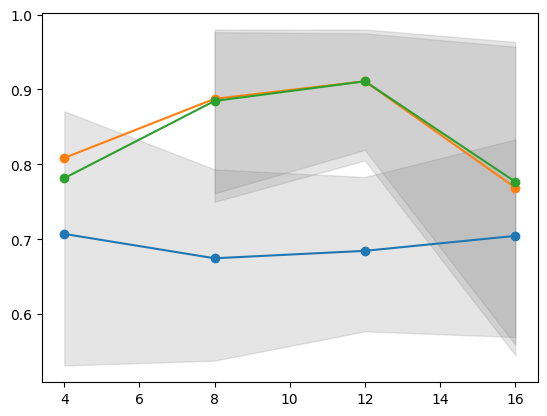

In [44]:
def calculate_and_plot_auroc_with_ci(cph_model, train_data_encoded, test_data_encoded, train_data, test_data, label, n_bootstraps=1000):
    # Calculate the risk scores for the test data using the Cox model
    test_risk_scores = cph_model.predict_partial_hazard(test_data_encoded)

    # Extract the event times and event indicators for test data
    y_test_time = test_scaled['time']
    y_test_status = test_scaled['Myeloma']

    # Calculate the C-index (on test data)
    c_index = concordance_index(y_test_time, -test_risk_scores, event_observed=y_test_status)
    print(f'C-index for {label} on Test Data: {c_index:.4f}')

    # Prepare the structured arrays for sksurv
    y_train_structured = np.array([(bool(status), time) for status, time in zip(train_scaled['Myeloma'], train_scaled['time'])],
                                  dtype=[('event', '?'), ('time', '<f8')])

    y_test_structured = np.array([(bool(status), time) for status, time in zip(test_scaled['Myeloma'], test_scaled['time'])],
                                 dtype=[('event', '?'), ('time', '<f8')])

    # Define time points for the AUC calculation
    specified_time_points = np.array([4, 8, 12, 16])

    # Calculate time-dependent AUROC using cumulative_dynamic_auc
    auc_scores, mean_auc = cumulative_dynamic_auc(y_train_structured, y_test_structured, test_risk_scores, specified_time_points)

    # Bootstrapping for confidence intervals
    auc_bootstrap = np.zeros((n_bootstraps, len(specified_time_points)))
    for i in range(n_bootstraps):
        # Resample test data
        resample_indices = np.random.choice(len(test_data_encoded), len(test_data_encoded), replace=True)
        test_data_resampled = test_data_encoded.iloc[resample_indices]
        y_test_resampled = y_test_structured[resample_indices]

        # Compute risk scores for resampled data
        test_risk_scores_resampled = cph_model.predict_partial_hazard(test_data_resampled)

        # Compute AUROC for resampled data
        auc_resampled, _ = cumulative_dynamic_auc(y_train_structured, y_test_resampled, test_risk_scores_resampled, specified_time_points)
        auc_bootstrap[i, :] = auc_resampled

    # Calculate mean and 95% confidence intervals for AUROC
    ci_lower = np.percentile(auc_bootstrap, 2.5, axis=0)
    ci_upper = np.percentile(auc_bootstrap, 97.5, axis=0)

    # Plot AUC over time with confidence bands
    plt.plot(specified_time_points, auc_scores, marker='o', label=f'{label} (Mean AUROC: {mean_auc:.2f}, C-index: {c_index:.2f})')
    plt.fill_between(specified_time_points, ci_lower, ci_upper, color='gray', alpha=0.2, label=f'{label} 95% CI')

    # Return mean AUROC, C-index, and confidence intervals for reporting
    return mean_auc, c_index, auc_scores, specified_time_points, ci_lower, ci_upper

# Calculate and plot AUROC with CI for Baseline Model
mean_auc_baseline, c_index_baseline, auc_baseline, times_baseline, ci_lower_baseline, ci_upper_baseline = calculate_and_plot_auroc_with_ci(
    scaled_baseline_cox, train_baseline, test_baseline, train_scaled, test_scaled, "Clinical Cox Model"
)

# Calculate and plot AUROC with CI for Proteomics Model
mean_auc_proteomics, c_index_proteomics, auc_proteomics, times_proteomics, ci_lower_proteomics, ci_upper_proteomics = calculate_and_plot_auroc_with_ci(
    scaled_proteomics_cox, train_proteomics, test_proteomics, train_scaled, test_scaled, "Proteomics Cox Model"
)

# Calculate and plot AUROC with CI for Full Model
mean_auc_full, c_index_full, auc_full, times_full, ci_lower_full, ci_upper_full = calculate_and_plot_auroc_with_ci(
    scaled_full_model_cox, train_full, test_full, train_scaled, test_scaled, "Combined Cox Model"
)


In [ ]:
def calculate_and_plot_auroc_with_ci(cph_model, train_data_encoded, test_data_encoded, train_data, test_data, label, n_bootstraps=1000):
    # Calculate the risk scores for the test data using the Cox model
    test_risk_scores = cph_model.predict_partial_hazard(test_data_encoded)

    # Extract the event times and event indicators for test data
    y_test_time = test_scaled['time']
    y_test_status = test_scaled['Myeloma']

    # Calculate the C-index (on test data)
    c_index = concordance_index(y_test_time, -test_risk_scores, event_observed=y_test_status)
    print(f'C-index for {label} on Test Data: {c_index:.4f}')

    # Prepare the structured arrays for sksurv
    y_train_structured = np.array([(bool(status), time) for status, time in zip(train_scaled['Myeloma'], train_scaled['time'])],
                                  dtype=[('event', '?'), ('time', '<f8')])

    y_test_structured = np.array([(bool(status), time) for status, time in zip(test_scaled['Myeloma'], test_scaled['time'])],
                                 dtype=[('event', '?'), ('time', '<f8')])

    # Define time points for the AUC calculation
    specified_time_points = np.array([4, 8, 12, 16])

    # Calculate time-dependent AUROC using cumulative_dynamic_auc
    auc_scores, mean_auc = cumulative_dynamic_auc(y_train_structured, y_test_structured, test_risk_scores, specified_time_points)

    # Bootstrapping for confidence intervals
    auc_bootstrap = np.zeros((n_bootstraps, len(specified_time_points)))
    for i in range(n_bootstraps):
        # Resample test data
        resample_indices = np.random.choice(len(test_data_encoded), len(test_data_encoded), replace=True)
        test_data_resampled = test_data_encoded.iloc[resample_indices]
        y_test_resampled = y_test_structured[resample_indices]

        # Compute risk scores for resampled data
        test_risk_scores_resampled = cph_model.predict_partial_hazard(test_data_resampled)

        # Compute AUROC for resampled data
        auc_resampled, _ = cumulative_dynamic_auc(y_train_structured, y_test_resampled, test_risk_scores_resampled, specified_time_points)
        auc_bootstrap[i, :] = auc_resampled

    # Calculate mean and 95% confidence intervals for AUROC
    ci_lower = np.percentile(auc_bootstrap, 2.5, axis=0)
    ci_upper = np.percentile(auc_bootstrap, 97.5, axis=0)

    # Plot AUC over time with confidence bands
    plt.plot(specified_time_points, auc_scores, marker='o', label=f'{label} (Mean AUROC: {mean_auc:.2f}, C-index: {c_index:.2f})')
    plt.fill_between(specified_time_points, ci_lower, ci_upper, color='gray', alpha=0.2, label=f'{label} 95% CI')

    # Return mean AUROC, C-index, and confidence intervals for reporting
    return mean_auc, c_index, auc_scores, specified_time_points, ci_lower, ci_upper

# Calculate and plot AUROC with CI for Baseline Model
mean_auc_baseline, c_index_baseline, auc_baseline, times_baseline, ci_lower_baseline, ci_upper_baseline = calculate_and_plot_auroc_with_ci(
    scaled_baseline_cox, train_baseline, test_baseline, train_scaled, test_scaled, "Clinical Cox Model"
)

# Calculate and plot AUROC with CI for Proteomics Model
mean_auc_proteomics, c_index_proteomics, auc_proteomics, times_proteomics, ci_lower_proteomics, ci_upper_proteomics = calculate_and_plot_auroc_with_ci(
    scaled_proteomics_cox, train_proteomics, test_proteomics, train_scaled, test_scaled, "Proteomics Cox Model"
)

# Calculate and plot AUROC with CI for Full Model
mean_auc_full, c_index_full, auc_full, times_full, ci_lower_full, ci_upper_full = calculate_and_plot_auroc_with_ci(
    scaled_full_model_cox, train_full, test_full, train_scaled, test_scaled, "Combined Cox Model"
)


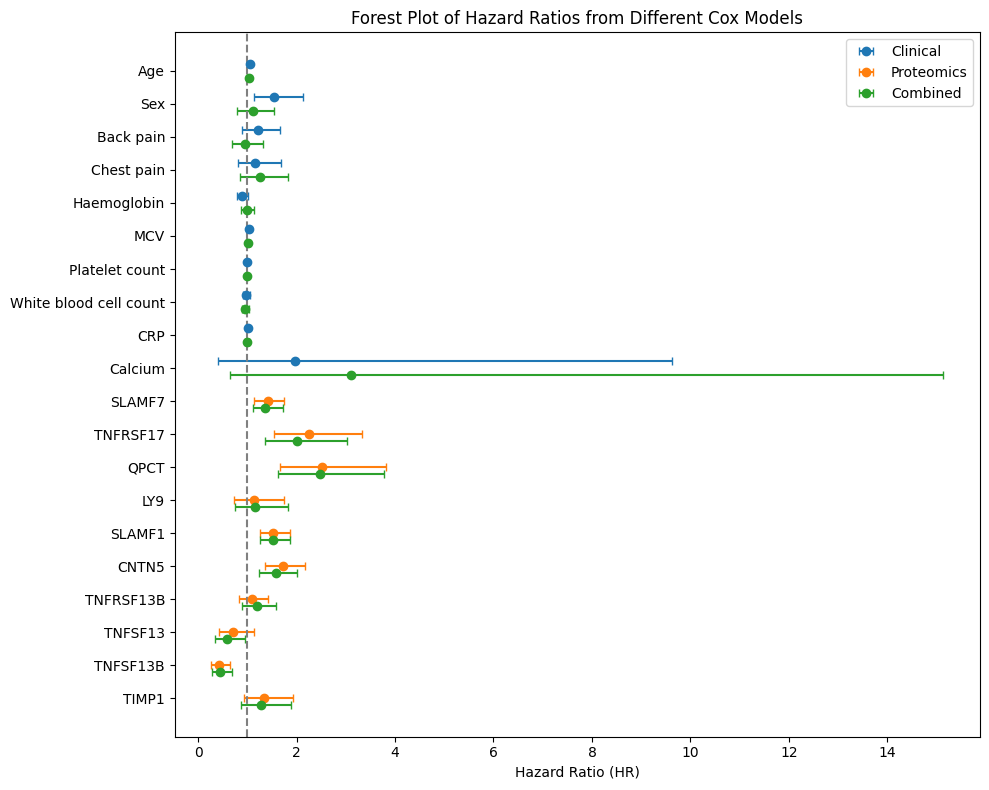

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data setup
data = {
    'Variable': [
        'Age', 'Sex', 'Back pain', 'Chest pain', 'Haemoglobin', 'MCV', 'Platelet count',
        'White blood cell count', 'CRP', 'Calcium', 'SLAMF7', 'TNFRSF17', 'QPCT', 'LY9',
        'SLAMF1', 'CNTN5', 'TNFRSF13B', 'TNFSF13', 'TNFSF13B', 'TIMP1'
    ],
    'Clinical_HR': [1.05, 1.55, 1.21, 1.16, 0.89, 1.03, 1.00, 0.98, 1.01, 1.96, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Clinical_CI_low': [1.03, 1.13, 0.89, 0.80, 0.79, 1.00, 1.00, 0.91, 0.98, 0.40, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Clinical_CI_high': [1.07, 2.14, 1.66, 1.68, 1.02, 1.06, 1.00, 1.06, 1.04, 9.62, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],

    'Proteomics_HR': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 
                      1.41, 2.26, 2.52, 1.13, 1.53, 1.72, 1.09, 0.70, 0.42, 1.34],
    'Proteomics_CI_low': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                          1.14, 1.54, 1.67, 0.72, 1.26, 1.36, 0.83, 0.43, 0.27, 0.94],
    'Proteomics_CI_high': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                           1.75, 3.33, 3.81, 1.75, 1.86, 2.17, 1.42, 1.13, 0.64, 1.92],

    'Combined_HR': [1.04, 1.11, 0.96, 1.25, 1.00, 1.01, 1.00, 0.96, 0.99, 3.10,
                    1.36, 2.01, 2.48, 1.16, 1.52, 1.58, 1.20, 0.58, 0.44, 1.28],
    'Combined_CI_low': [1.01, 0.79, 0.69, 0.85, 0.88, 0.98, 1.00, 0.90, 0.96, 0.64,
                        1.12, 1.36, 1.63, 0.74, 1.25, 1.23, 0.90, 0.35, 0.28, 0.88],
    'Combined_CI_high': [1.06, 1.55, 1.32, 1.82, 1.14, 1.05, 1.00, 1.03, 1.03, 15.14,
                         1.73, 3.02, 3.78, 1.82, 1.86, 2.01, 1.58, 0.95, 0.69, 1.88]
}

df = pd.DataFrame(data)

# Melt the DataFrame so we have a long format with columns: Variable, Model, HR, CI_low, CI_high
# We'll make a helper DataFrame for each model and then concatenate.
def reshape_model(df, model_prefix):
    return (df[['Variable', 
                f'{model_prefix}_HR', 
                f'{model_prefix}_CI_low', 
                f'{model_prefix}_CI_high']]
            .rename(columns={f'{model_prefix}_HR':'HR', 
                             f'{model_prefix}_CI_low':'CI_low', 
                             f'{model_prefix}_CI_high':'CI_high'})
            .assign(Model=model_prefix)
           )

clinical_df = reshape_model(df, 'Clinical')
proteomics_df = reshape_model(df, 'Proteomics')
combined_df = reshape_model(df, 'Combined')

long_df = pd.concat([clinical_df, proteomics_df, combined_df], ignore_index=True)

# Drop rows where HR is NaN (no data)
long_df = long_df.dropna(subset=['HR'])

# Sort variables so clinical appear on top (or any order desired)
long_df['Variable'] = pd.Categorical(long_df['Variable'], categories=df['Variable'], ordered=True)
long_df = long_df.sort_values('Variable')

# Create the forest plot
fig, ax = plt.subplots(figsize=(10, 8))

# We will plot each variable on the y-axis with multiple points (one per Model) side-by-side.
# To avoid overlapping points for each variable, we can give each model a small horizontal offset.

models = ['Clinical', 'Proteomics', 'Combined']
model_offsets = {'Clinical': -0.2, 'Proteomics': 0.0, 'Combined': 0.2}

# Extract unique variables in the order they appear
variables = long_df['Variable'].unique()
y_positions = np.arange(len(variables))

for model in models:
    subset = long_df[long_df['Model'] == model]
    # Match subset to the ordering of 'variables'
    subset = subset.set_index('Variable').reindex(variables)
    # Plot only if there's data for the model
    hr = subset['HR']
    ci_low = subset['CI_low']
    ci_high = subset['CI_high']
    
    # Calculate x position offset for each model
    x_pos = y_positions + model_offsets[model]
    
    # Only plot points where HR is not NaN
    mask = hr.notna()
    hr = hr[mask]
    ci_low = ci_low[mask]
    ci_high = ci_high[mask]
    x_pos = x_pos[mask]
    
    # Plot error bars (horizontal lines for CIs, point for HR)
    ax.errorbar(hr, x_pos, xerr=[hr - ci_low, ci_high - hr], fmt='o', label=model, capsize=3)

# Add a vertical line at HR=1 as a reference
ax.axvline(1.0, color='grey', linestyle='--')

# Set y-ticks to variables
ax.set_yticks(y_positions)
ax.set_yticklabels(variables)

ax.set_xlabel('Hazard Ratio (HR)')
ax.set_title('Forest Plot of Hazard Ratios from Different Cox Models')
ax.legend()

plt.gca().invert_yaxis()  # Invert y-axis so top variable is at the top
plt.tight_layout()
plt.show()